In [2]:

#!conda install nltk --yes

In [2]:
#import glove
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 


In [1]:
#import nltk 
#nltk.download() 
#!pip install glove-python-binary  thanks to @Ironwolf on github [necessary on Windows]
#note only 3.7 works so far

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
import os
all_lines = []
#for root, dirs, files in os.walk(r'E:\gamestext_processed_null\0__1__2__3__POST'):
#for root, dirs, files in os.walk(r'E:\gamestext_processed_glove\0__1__2__3__4__5__6__7__8__9__POST__10__11'):    
#for root, dirs, files in os.walk(r'E:\gamestext_processed_glove\0__1__2__3__4__5__6__7__8__9__POST__10__11__12'): 
for root, dirs, files in os.walk(r'D:\gamestext_processed_orig\0__1__2__3__4__5__6__7__8__9__10__11__12__13__14__15__16__17__18__19__20__21__POST__22__23__24'):     
    
    
    for file in files:
        if '.txt' in file:
            with open( os.path.join(root,file) ) as f:
                content = f.readlines()
                all_lines.append(content)

In [4]:
len(all_lines)

4813

In [5]:
from tqdm import tqdm

In [6]:
stop_words=set(stopwords.words('english')) 
wordnet_lemmatizer = WordNetLemmatizer() 
lines_with_lemmas = []
string=' ' 
count = 0
for file in tqdm(all_lines, total=len(all_lines)):
    #print(file)
    for line in file:
        splitline = line.split(' ')
        temp_line=[] 
        #count = count + 1
        #print(count)
        for word in splitline: 
            #word = word.strip()
            #if not word.isnumeric():
            if word.isalpha():
                #if len(word) > 1:
                if len(word) > 2:
                    word = word.lower()
                    if word not in stop_words: 
                        temp_line.append(wordnet_lemmatizer.lemmatize(word)) 

        if len(temp_line) > 0:
            lines_with_lemmas.append(string.join(temp_line)) 

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4813/4813 [12:56<00:00,  6.20it/s]


In [7]:
len(lines_with_lemmas)

4738

In [8]:
lines_with_lemmas[0]

'basic fantasy rpg supplement release copyright shayne power right reserved distributed term open game license version basic fantasy website introduction supplement provides alternate method equipping new character play basic fantasy role playing game rule copy basic fantasy rpg rule visit website download copy find variety pre selected equipment pack permit player quickly equip character total weight pack included convenience weight gold included choosing equipment way replaces standard method rolling starting money use system use starting money roll character start basic pack class based pack choice spend additional gold bonus pack item normal equipment list upgrade weapon armor class pack approval character swap given weapon similar power battle axe place longsword standard equipment pack basic pack backpack torch tinderbox flint steel wineskin waterskin winter blanket ration dry week sack large sack small gold piece fighter pack chain mail shield longsword fighter pack chain mail p

In [9]:
all_new_lines=[] 
for line in tqdm(lines_with_lemmas, total=len(lines_with_lemmas)): 
    splitline=line.split(' ') 
    all_new_lines.append(splitline)
    #all_new_lines.append([splitline])

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4738/4738 [00:11<00:00, 402.64it/s]


In [10]:
len(all_new_lines)

4738

In [11]:
from glove import Corpus, Glove
corpusALL = Corpus() 

In [12]:
Corpus.__dict__

mappingproxy({'__module__': 'glove.corpus',
              '__doc__': '\n    Class for constructing a cooccurrence matrix\n    from a corpus.\n\n    A dictionry mapping words to ids can optionally\n    be supplied. If left None, it will be constructed\n    from the corpus.\n    ',
              '__init__': <function glove.corpus.Corpus.__init__(self, dictionary=None)>,
              '_check_dict': <function glove.corpus.Corpus._check_dict(self, dictionary)>,
              'fit': <function glove.corpus.Corpus.fit(self, corpus, window=10, ignore_missing=False)>,
              'save': <function glove.corpus.Corpus.save(self, filename)>,
              'load': <classmethod at 0x28fe147da88>,
              '__dict__': <attribute '__dict__' of 'Corpus' objects>,
              '__weakref__': <attribute '__weakref__' of 'Corpus' objects>})

In [13]:
#training the corpus to generate the co occurence matrix which is used in GloVe
#corpusALL.fit(lines_with_lemmas, window=15)
corpusALL.fit(all_new_lines, window=15)


In [14]:
type(lines_with_lemmas)

list

In [15]:
type(lines_with_lemmas[0])
type(all_new_lines[0])

list

In [16]:
lines_with_lemmas[0]

'basic fantasy rpg supplement release copyright shayne power right reserved distributed term open game license version basic fantasy website introduction supplement provides alternate method equipping new character play basic fantasy role playing game rule copy basic fantasy rpg rule visit website download copy find variety pre selected equipment pack permit player quickly equip character total weight pack included convenience weight gold included choosing equipment way replaces standard method rolling starting money use system use starting money roll character start basic pack class based pack choice spend additional gold bonus pack item normal equipment list upgrade weapon armor class pack approval character swap given weapon similar power battle axe place longsword standard equipment pack basic pack backpack torch tinderbox flint steel wineskin waterskin winter blanket ration dry week sack large sack small gold piece fighter pack chain mail shield longsword fighter pack chain mail p

In [19]:
len(corpusALL.dictionary)

668894

In [20]:
Glove.__dict__

mappingproxy({'__module__': 'glove.glove',
              '__doc__': '\n    Class for estimating GloVe word embeddings using the\n    corpus coocurrence matrix.\n    ',
              '__init__': <function glove.glove.Glove.__init__(self, no_components=30, learning_rate=0.05, alpha=0.75, max_count=100, max_loss=10.0, random_state=None)>,
              'fit': <function glove.glove.Glove.fit(self, matrix, epochs=5, no_threads=2, verbose=False)>,
              'transform_paragraph': <function glove.glove.Glove.transform_paragraph(self, paragraph, epochs=50, ignore_missing=False)>,
              'add_dictionary': <function glove.glove.Glove.add_dictionary(self, dictionary)>,
              'save': <function glove.glove.Glove.save(self, filename)>,
              'load': <classmethod at 0x28fffbe7a08>,
              'load_stanford': <classmethod at 0x28fffbe7ac8>,
              '_similarity_query': <function glove.glove.Glove._similarity_query(self, word_vec, number)>,
              'most_simil

In [21]:
gloveALL = Glove(no_components=300, learning_rate=0.05)
 
gloveALL.fit(corpusALL.matrix, epochs=300, no_threads=32, verbose=True)
gloveALL.add_dictionary(corpusALL.dictionary)
gloveALL.save('D:\Calibre_glove_6.model')

Performing 300 training epochs with 32 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
Epoch 50
Epoch 51
Epoch 52
Epoch 53
Epoch 54
Epoch 55
Epoch 56
Epoch 57
Epoch 58
Epoch 59
Epoch 60
Epoch 61
Epoch 62
Epoch 63
Epoch 64
Epoch 65
Epoch 66
Epoch 67
Epoch 68
Epoch 69
Epoch 70
Epoch 71
Epoch 72
Epoch 73
Epoch 74
Epoch 75
Epoch 76
Epoch 77
Epoch 78
Epoch 79
Epoch 80
Epoch 81
Epoch 82
Epoch 83
Epoch 84
Epoch 85
Epoch 86
Epoch 87
Epoch 88
Epoch 89
Epoch 90
Epoch 91
Epoch 92
Epoch 93
Epoch 94
Epoch 95
Epoch 96
Epoch 97
Epoch 98
Epoch 99
Epoch 100
Epoch 101
Epoch 102
Epoch 103
Epoch 104
Epoch 105
Epo

In [22]:
len(gloveALL.dictionary)
gloveALL.word_vectors.shape

(668894, 300)

In [27]:
gloveALL.most_similar('blaster',10)

[('pistol', 0.5464444299887373),
 ('rifle', 0.5055540065441866),
 ('cannon', 0.47550953750062874),
 ('laser', 0.4669447283489641),
 ('repeating', 0.46206087947712415),
 ('plasma', 0.46014100522056356),
 ('blast', 0.4528541433938414),
 ('subaqua', 0.44696030582231033),
 ('captaindoes', 0.4386782776712758)]

In [28]:
gloveALL.most_similar('dungeon',10)

[('monster', 0.5308474517364581),
 ('crawl', 0.5240537885490163),
 ('exploring', 0.514042847824802),
 ('master', 0.508328594850809),
 ('wilderness', 0.5063429208236951),
 ('dynames', 0.5018108394868319),
 ('adventure', 0.4973573938266718),
 ('encounter', 0.4902509022654424),
 ('denizen', 0.4898169811117418)]

In [29]:
gloveALL.most_similar('cleric',10)

[('druid', 0.5891318771622918),
 ('paladin', 0.585929786494128),
 ('undead', 0.5383653297995311),
 ('priest', 0.5373660777808938),
 ('deity', 0.5353975289352212),
 ('casting', 0.521193631446264),
 ('lawful', 0.5146482282214877),
 ('fighter', 0.5114239734481086),
 ('spell', 0.5105563405778771)]

In [31]:
gloveALL.most_similar('thief',10)

[('assassin', 0.601433964082679),
 ('guild', 0.5472158331969285),
 ('steal', 0.5441240032005678),
 ('adventurer', 0.5252437225448775),
 ('rogue', 0.5181243390984542),
 ('burglar', 0.5143786475802887),
 ('thug', 0.49416646348098864),
 ('stealing', 0.49314185990707765),
 ('stolen', 0.4924135401261309)]

In [32]:
gloveALL.most_similar('wizard',10)

[('sorcerer', 0.6190000339128486),
 ('coast', 0.5739430708445086),
 ('magic', 0.5165627547677607),
 ('casting', 0.4943953086766111),
 ('cast', 0.49370841100003143),
 ('magical', 0.487455076371427),
 ('version', 0.47931277044469595),
 ('spell', 0.4772202627481849),
 ('mage', 0.47547586774320155)]

In [33]:
gloveALL.most_similar('magicuser',10)

[('spellcaster', 0.3244771588823439),
 ('spell', 0.30535958755452414),
 ('cast', 0.3012790658690846),
 ('user', 0.29410255193029045),
 ('scroll', 0.2891568103834816),
 ('cleric', 0.2850845864857979),
 ('cneur', 0.2814163674096296),
 ('level', 0.27248990131916784),
 ('polodin', 0.27224007826180435)]

In [34]:
gloveALL.most_similar('str',10)

[('dex', 0.7231449130580777),
 ('con', 0.6717111261570983),
 ('int', 0.6521539815665245),
 ('cha', 0.553633205288709),
 ('siz', 0.5511418630582388),
 ('sta', 0.5188016891204617),
 ('char', 0.5108098122965291),
 ('grab', 0.5046229947656891),
 ('wi', 0.5039508640050404)]

In [36]:
gloveALL.word_vectors[0]

array([ 9.09297606e-02,  1.17665898e-01,  2.06887685e-01, -1.21913809e-01,
       -1.53523163e-02, -5.75023010e-02, -2.42952079e-01,  4.56386267e-03,
       -1.29144543e-01,  1.88627752e-01,  1.40875826e-01,  1.59053458e-01,
       -3.98722782e-01,  4.78163919e-02,  1.38121540e-01, -2.86561262e-01,
       -1.69870812e-01,  1.62132186e-01,  2.48445264e-01, -8.64570734e-02,
       -4.31638990e-02, -2.75588622e-01,  1.34159856e-01,  3.46031383e-01,
       -4.45070837e-01, -3.05917096e-01, -2.56014125e-01, -3.22879724e-01,
        3.87500464e-02,  1.03063628e-01, -2.57761326e-04, -7.16170441e-02,
       -4.15910147e-01, -3.82566250e-02, -1.56410871e-01, -1.04601099e-01,
       -2.55415043e-01, -2.49756357e-01, -1.53082800e-01,  4.21547544e-01,
        1.85822191e-01,  1.04026733e-01,  5.14332639e-01,  1.86981170e-01,
       -1.65682989e-01, -3.05036311e-02, -1.07337824e-01, -9.02601353e-03,
       -2.17276648e-01, -5.68762971e-02,  2.47875192e-01, -2.02026409e-01,
        1.98969916e-01,  

In [61]:
import io

def makeVectorTSV(embeddingVectorsOnly):
    out_v = io.open('D:/log/vecs.tsv', 'w', encoding='utf-8')
    for n,weights in enumerate(embeddingVectorsOnly):
        vec = embeddingVectorsOnly[n]
        out_v.write('\t'.join([str(x) for x in vec]) + "\n")
        
def makeMetaTSV(words):
    with open('D:/log/metadata1.tsv', 'w') as f:
#     for word in word2vec.words:
        print(len(words),"length of words")
        for word in words:
            f.write(word + '\n')
            
def writeEmbeddingWithWordsAndVectorsToFilesForEmbeddingProjector(embedding):
    vectors_only = []
    keys_in_array = list(embedding.dictionary)
    for key in keys_in_array:
        vectors_only.append(embedding.word_vectors[embedding.dictionary[key]])
        #break
    makeVectorTSV(vectors_only)
    makeMetaTSV(keys_in_array)
    print("done")            

In [62]:
writeEmbeddingWithWordsAndVectorsToFilesForEmbeddingProjector(gloveALL)

668894 length of words
done


In [58]:
gloveALL.dictionary['spell']
gloveALL.word_vectors[gloveALL.dictionary['spell']]

array([-0.04792466,  0.31105575,  0.59022003, -0.11404568, -0.16151025,
       -0.49198247,  0.37973677,  0.17679315, -0.1686112 , -0.42753299,
        0.3075134 ,  0.34099833, -0.1065586 , -0.10753035,  0.26670849,
        0.29263087,  0.1867861 ,  0.25112701,  0.01655793, -0.18241259,
        0.24318166, -0.27241966,  0.00872542,  0.24553964,  0.0680015 ,
       -0.29668683,  0.22465334, -0.37307547, -0.12360021,  0.08498648,
       -0.21055678, -0.26830905, -0.22012842, -0.16762977, -0.37219085,
       -0.35946991, -0.14623786,  0.18543143,  0.25392248,  0.34121339,
        0.07776955,  0.00362877,  0.42788763, -0.51130943, -0.37230463,
       -0.17749508,  0.1988996 , -0.24771312, -0.30867805,  0.37962808,
        0.17887269, -0.23477306, -0.05171352, -0.00677091,  0.04857406,
       -0.03705183,  0.16966253, -0.40194678, -0.11786335,  0.5032339 ,
        0.32940626,  0.06297373,  0.04814329, -0.23739513,  0.07285507,
        0.29202641,  0.47824469, -0.16371955, -0.26681586,  0.33

In [57]:
type(gloveALL)

glove.glove.Glove

In [68]:
import numpy as np
def find_cosine_similarity(u, v):
    distance = 0.0
    dot = np.dot(u,v)
    norm_u = np.sqrt(np.sum(u**2))
    norm_v = np.sqrt(np.sum(v**2))
    distance = dot/(norm_u)/norm_v
    return distance

def gword(word):
    retword = gloveALL.word_vectors[gloveALL.dictionary[word]]
    
    return retword

In [69]:
father = gword("father")
mother = gword("mother")
king = gword("king")
queen = gword("queen")
bat = gword("bat")
crow = gword("crow")
india = gword("india")
italy = gword("italy")
delhi = gword("delhi")
rome = gword("rome")

In [70]:
print("cosine_similarity(king, queen) = ", find_cosine_similarity(king, queen))
print("cosine_similarity(father, mother) = ", find_cosine_similarity(father, mother))
print("cosine_similarity(king - queen, father - mother) = ",find_cosine_similarity(king - queen, father - mother))
print("cosine_similarity(bat, crow) = ",find_cosine_similarity(bat, crow))
print("cosine_similarity(india - delhi, rome - italy) = ",find_cosine_similarity(india - delhi, rome - italy))

cosine_similarity(king, queen) =  0.5797008739038013
cosine_similarity(father, mother) =  0.6918265758816928
cosine_similarity(king - queen, father - mother) =  0.2793283598580076
cosine_similarity(bat, crow) =  0.27741989755357077
cosine_similarity(india - delhi, rome - italy) =  -0.10116295432812027


In [77]:
def find_analogy(word_a, word_b, word_c, word_to_vec):
    word_a = word_a.lower()
    word_b = word_b.lower()
    word_c = word_c.lower()
    
    e_a, e_b, e_c = gloveALL.word_vectors[gloveALL.dictionary[word_a]], gloveALL.word_vectors[gloveALL.dictionary[word_b]], gloveALL.word_vectors[gloveALL.dictionary[word_c]]
    
    words = gloveALL.dictionary.keys()
    max_cosine_sim = -999
    best_word = None
    
    for w in words:
        if w in [word_a, word_b, word_c]:
            continue
        cosine_sim = find_cosine_similarity(e_b - e_a, gloveALL.word_vectors[gloveALL.dictionary[w]] - e_c)
        
        if cosine_sim > max_cosine_sim:
            max_cosine_sim = cosine_sim
            best_word = w
            
    return best_word

In [78]:
examples = [('india', 'delhi', 'japan'), ('tall', 'taller', 'large')]
for example in examples:
    print ('{} -> {} :: {} -> {}'.format( *example, find_analogy(*example, gloveALL)))

india -> delhi :: japan -> thenationalcapitalofnew
tall -> taller :: large -> slenderer


In [79]:
examples = [('fighter', 'ranger', 'cleric'), ('magicuser', 'sorcerer', 'thief')]
for example in examples:
    print ('{} -> {} :: {} -> {}'.format( *example, find_analogy(*example, gloveALL)))

fighter -> ranger :: cleric -> texas
magicuser -> sorcerer :: thief -> sorcery


In [80]:
examples = [('fighter', 'paladin', 'cleric'), ('magicuser', 'spell', 'thief')]
for example in examples:
    print ('{} -> {} :: {} -> {}'.format( *example, find_analogy(*example, gloveALL)))

fighter -> paladin :: cleric -> edict
magicuser -> spell :: thief -> cast


In [170]:
examples = [('fighting', 'agility', 'reason'), ('str', 'dex', 'int')]
for example in examples:
    print ('{} -> {} :: {} -> {}'.format( *example, find_analogy(*example, gloveALL)))

fighting -> agility :: reason -> ibs
str -> dex :: int -> bloodbird


In [171]:
examples = [('fighting', 'cleric', 'ranger'), ('dungeon', 'dragon', 'villain')]
for example in examples:
    print ('{} -> {} :: {} -> {}'.format( *example, find_analogy(*example, gloveALL)))

fighting -> cleric :: ranger -> druid
dungeon -> dragon :: villain -> breath


In [88]:
gloveALL.most_similar('player')

[('character', 0.7603034117753397),
 ('play', 0.6960456015021556),
 ('decide', 0.6786590442807079),
 ('gamemaster', 0.6690209062118782)]

In [95]:
gloveALL.most_similar('lich',20)

[('aldwyn', 0.5886149351316543),
 ('undead', 0.5196124247955897),
 ('liches', 0.5167268370282991),
 ('thalath', 0.49977019320862714),
 ('phylactery', 0.48629174856759455),
 ('king', 0.4819390801900699),
 ('bctvown', 0.45341534818634627),
 ('roilsuccuds', 0.446915956916772),
 ('diabolist', 0.44346685128560803),
 ('neverbecome', 0.4363450448586957),
 ('azalin', 0.435993246833863),
 ('icon', 0.41828676642570534),
 ('powerful', 0.41262706383198366),
 ('spulls', 0.41172781125229047),
 ('successfullyparley', 0.4111428666457884),
 ('archmage', 0.4071645912855223),
 ('servant', 0.4068408663412435),
 ('slain', 0.406773886998852),
 ('demi', 0.405096703438316)]

In [172]:
gloveALL.most_similar('undead',20)

[('legelegelegends', 0.6562674529384167),
 ('turning', 0.5866519782408888),
 ('legelegelegelegelegelegelegelegends', 0.5599038681563385),
 ('dead', 0.5594039516309265),
 ('zombie', 0.5564873284050331),
 ('mindless', 0.5491128824424314),
 ('creature', 0.5468749358286339),
 ('cleric', 0.5383653297995311),
 ('skeleton', 0.5378502556126177),
 ('vampire', 0.5342760618913771),
 ('turned', 0.5308828474325249),
 ('immune', 0.5270936052808967),
 ('lich', 0.5196124247955898),
 ('living', 0.5112167170497927),
 ('construct', 0.5104373896076086),
 ('ghoul', 0.5066329672107336),
 ('corps', 0.5048590852931862),
 ('monster', 0.5038528550832345),
 ('corpse', 0.502829181836439)]

In [100]:
gloveALL.most_similar('dungeon',20)

[('monster', 0.5308474517364581),
 ('crawl', 0.5240537885490163),
 ('exploring', 0.514042847824802),
 ('master', 0.508328594850809),
 ('wilderness', 0.5063429208236951),
 ('dynames', 0.5018108394868319),
 ('adventure', 0.4973573938266718),
 ('encounter', 0.4902509022654424),
 ('denizen', 0.4898169811117418),
 ('adventurer', 0.4872860089194493),
 ('explore', 0.47408444271675476),
 ('wandering', 0.47011732484039864),
 ('cavern', 0.46709201300106523),
 ('pardi', 0.46255480251428516),
 ('labyrinth', 0.4621222019522132),
 ('map', 0.462098007494779),
 ('dragon', 0.4608867999674919),
 ('cave', 0.46041776942203616),
 ('ruin', 0.4599941949817537)]

In [101]:
gloveALL.most_similar('sanity',20)

[('loss', 0.5872266452641388),
 ('dloll', 0.5471106956415557),
 ('mythos', 0.5427923791768161),
 ('stability', 0.5172264255522425),
 ('lose', 0.51556909252144),
 ('harvfy', 0.5014105669814433),
 ('losing', 0.5009703771856407),
 ('dcriv', 0.49893312025526393),
 ('iossrs', 0.493822471990706),
 ('eumnt', 0.4914293750242009),
 ('currrni', 0.48431830541309384),
 ('insanity', 0.47883696533262743),
 ('investigator', 0.4755805242254264),
 ('devotf', 0.47267197599812744),
 ('loioo', 0.47247430473696644),
 ('knoii', 0.47081463436667326),
 ('madness', 0.46921859655849546),
 ('loses', 0.4633959610563287),
 ('currtl', 0.4629376453059811)]

In [179]:
gloveALL.most_similar('glaive',20)

[('halberd', 0.3924078559645291),
 ('guisanne', 0.34986516662639505),
 ('berdiche', 0.33091870133440093),
 ('spinner', 0.32241756098684576),
 ('guisarme', 0.3021637315956291),
 ('laive', 0.2938629371989626),
 ('battleaxe', 0.29304633817030684),
 ('paradox', 0.26999953240566776),
 ('twoscimitars', 0.2699052844625671),
 ('flail', 0.26599764829367156),
 ('tier', 0.26484403854196564),
 ('polearms', 0.2647582428007007),
 ('glaives', 0.26001184760142493),
 ('pike', 0.2584444243079427),
 ('polearm', 0.2579509310661106),
 ('kerielia', 0.2546459744169234),
 ('bstswrd', 0.25432636223199895),
 ('pole', 0.25339948063825507),
 ('greatsword', 0.2519612760742241)]

In [180]:
gloveALL.most_similar('sword',200)

[('dagger', 0.6229820191638352),
 ('blade', 0.5987800418174192),
 ('spear', 0.5807696923342608),
 ('handed', 0.5561702421042428),
 ('bastard', 0.5453906991703064),
 ('ax', 0.5401519413481326),
 ('knife', 0.5374311441442128),
 ('short', 0.5326357452933566),
 ('weapon', 0.5320231337300095),
 ('wielding', 0.5174357119878098),
 ('axe', 0.5127776915293416),
 ('zashar', 0.5126220171145531),
 ('wielder', 0.5080911360987176),
 ('shield', 0.5034373769343262),
 ('bow', 0.4891968480295959),
 ('wielded', 0.4874137963595855),
 ('hand', 0.48418646333905),
 ('wield', 0.48096198886177755),
 ('hilt', 0.480154281583499),
 ('agerun', 0.47913954223275546),
 ('scimitar', 0.47760757698916817),
 ('broadsword', 0.4757261858021606),
 ('longsword', 0.4741154945277749),
 ('enchanted', 0.47035223919374364),
 ('ashlultum', 0.468154209036693),
 ('decmus', 0.46682132445160074),
 ('arming', 0.466741738677587),
 ('armed', 0.4662273436627057),
 ('wizardry', 0.46431687926695464),
 ('mace', 0.46225550100859925),
 ('edged

In [103]:
gloveALL.most_similar('tsr',20)

[('copyrtgh', 0.5733132145912392),
 ('rigms', 0.5553051321237729),
 ('oesigncopyrighl', 0.5552096200747749),
 ('rlntrd', 0.5169275812543703),
 ('onnd', 0.483460215673009),
 ('charactns', 0.4750041422587855),
 ('ownocl', 0.46530806528784846),
 ('yesc', 0.46122198091043437),
 ('poducts', 0.45378254583997696),
 ('owred', 0.44496083336630854),
 ('ptrmossoon', 0.4425583142898042),
 ('omcd', 0.43291596981065283),
 ('klydom', 0.4322691428590392),
 ('imaglnatiou', 0.4305683223612483),
 ('kongdom', 0.42031118759536085),
 ('atrademarkowned', 0.4128277558581007),
 ('owned', 0.41074908822730316),
 ('onyed', 0.40992420207463875),
 ('permiuion', 0.4034305501174422)]

In [104]:
gloveALL.most_similar('ogl',20)

[('fllg', 0.39921349654971583),
 ('suitable', 0.3620238848840872),
 ('descripvided', 0.2987256342622486),
 ('exception', 0.2849247003665761),
 ('product', 0.279460028218551),
 ('designated', 0.2735628676985423),
 ('mmorr', 0.27092588709983123),
 ('forlocal', 0.2642284842320269),
 ('recautions', 0.2630061527082972),
 ('zihoa', 0.2627675094585457),
 ('generic', 0.26166692051733564),
 ('megatraveller', 0.2616376725019162),
 ('titigation', 0.25773682066242803),
 ('game', 0.2537830633643548),
 ('refer', 0.2528403907951255),
 ('version', 0.25079077595472693),
 ('fantasy', 0.245157324207686),
 ('content', 0.24459036052602215),
 ('guide', 0.2438537285011923)]

In [110]:
gloveALL.most_similar('conan',20)

[('corebook', 0.5209992335691701),
 ('howard', 0.5038298469642682),
 ('hyborian', 0.4743523569215268),
 ('barbarian', 0.47133993318098016),
 ('aquilonia', 0.4635037167432496),
 ('described', 0.4387551303400103),
 ('wanderer', 0.4332946604337763),
 ('presented', 0.4318745180684894),
 ('roleplaying', 0.42581638877924527),
 ('mercenary', 0.4156838180149848),
 ('king', 0.4093951739548432),
 ('cimmeria', 0.40927097360860204),
 ('cimmerian', 0.40858011742923783),
 ('kingdom', 0.40693782577804616),
 ('brigand', 0.4057726301839037),
 ('international', 0.3949317539088349),
 ('sorcery', 0.3930525750868376),
 ('mentioned', 0.3925705520454866),
 ('adventure', 0.3893592241255846)]

In [141]:
gloveALL.most_similar('vargr',20)

[('corsair', 0.5050724306735879),
 ('vilani', 0.4651995567547944),
 ('coreward', 0.45856541023808745),
 ('imperial', 0.453346543511768),
 ('aslan', 0.4510640908524544),
 ('imperium', 0.4484164683460552),
 ('zhodani', 0.4322308303381205),
 ('extent', 0.4296907996163181),
 ('ikonaz', 0.41214515776289795),
 ('sector', 0.41184519704755496),
 ('ovaghoun', 0.4117352913546439),
 ('suedzuk', 0.4049297415847705),
 ('dominated', 0.40351902647729904),
 ('humnlti', 0.39832400659622574),
 ('human', 0.3972580420110932),
 ('race', 0.39704780807602563),
 ('interstellar', 0.3935667912220411),
 ('irilitok', 0.39352485201241805),
 ('protectorate', 0.3927369099581802)]

In [146]:
#!conda install scikit-learn --yes
!conda install matplotlib --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\rscott\AppData\Local\anaconda3\envs\glove

  added / updated specs:
    - matplotlib






==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.3.1




The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    kiwisolver-1.4.4           |   py37h8c56517_0          60 KB  conda-forge
    matplotlib-3.2.2           |                1           6 KB  conda-forge
    matplotlib-base-3.2.2      |   py37hab8957c_1         7.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         7.1 MB

The following NEW packages will be INSTALLED:

  cycler             conda-forge/noarch::cycler-0.11.0-pyhd8ed1ab_0 
  freetype           conda-forge/win-64::freetype-2.12.1-h546665d_1 
  kiwisolver         conda-forge/win-64::kiwisolver-1.4.4-py37h8c56517_0 
  matplotlib         conda-forge/win-64::matplotlib-3.2.2-1 
  matplotlib-base    conda-forge/win-64::matplotlib-base-3.2.2-py37hab8957c_1 
  pyparsing          conda-forge/noarch::pyparsing-3.0.9-pyhd8ed1ab_0 
  zlib               

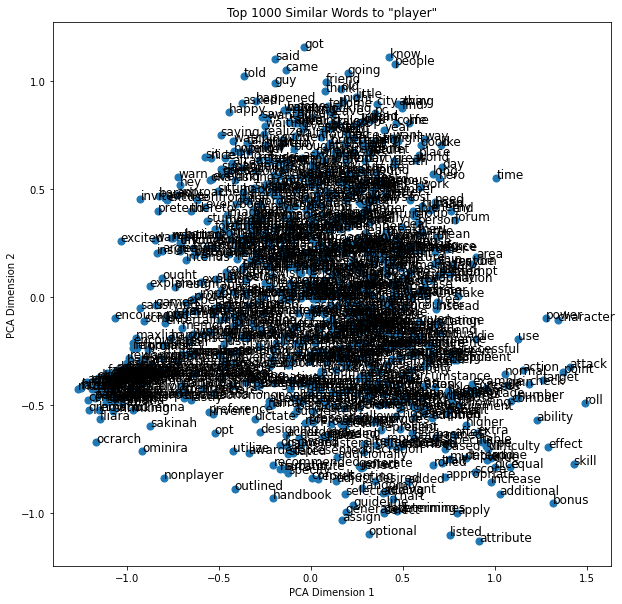

In [150]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#from gensim.models import KeyedVectors

# Load the pre-trained GloVe word embeddings

# Select the top 1000 most similar words to a given word
word = 'player'
similar_words = [word] + [w[0] for w in gloveALL.most_similar(word, 999)]

if 1 == 1:
    # Get the GloVe embeddings for the selected words
    embeddings = []
    labels = []
    for w in similar_words:
        if w in gloveALL.dictionary:
            embeddings.append(gloveALL.word_vectors[gloveALL.dictionary[w]])
            labels.append(w)

    # Apply PCA to reduce the dimensionality of the embeddings
    pca = PCA(n_components=2)
    embeddings_pca = pca.fit_transform(embeddings)

    # Plot the embeddings in 2D space with labels
    plt.figure(figsize=(10, 10))
    plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], s=50)
    for i, label in enumerate(labels):
        plt.annotate(label, xy=(embeddings_pca[i, 0], embeddings_pca[i, 1]), fontsize=12)
    plt.title('Top 1000 Similar Words to "{}"'.format(word))
    plt.xlabel('PCA Dimension 1')
    plt.ylabel('PCA Dimension 2')
    plt.show()

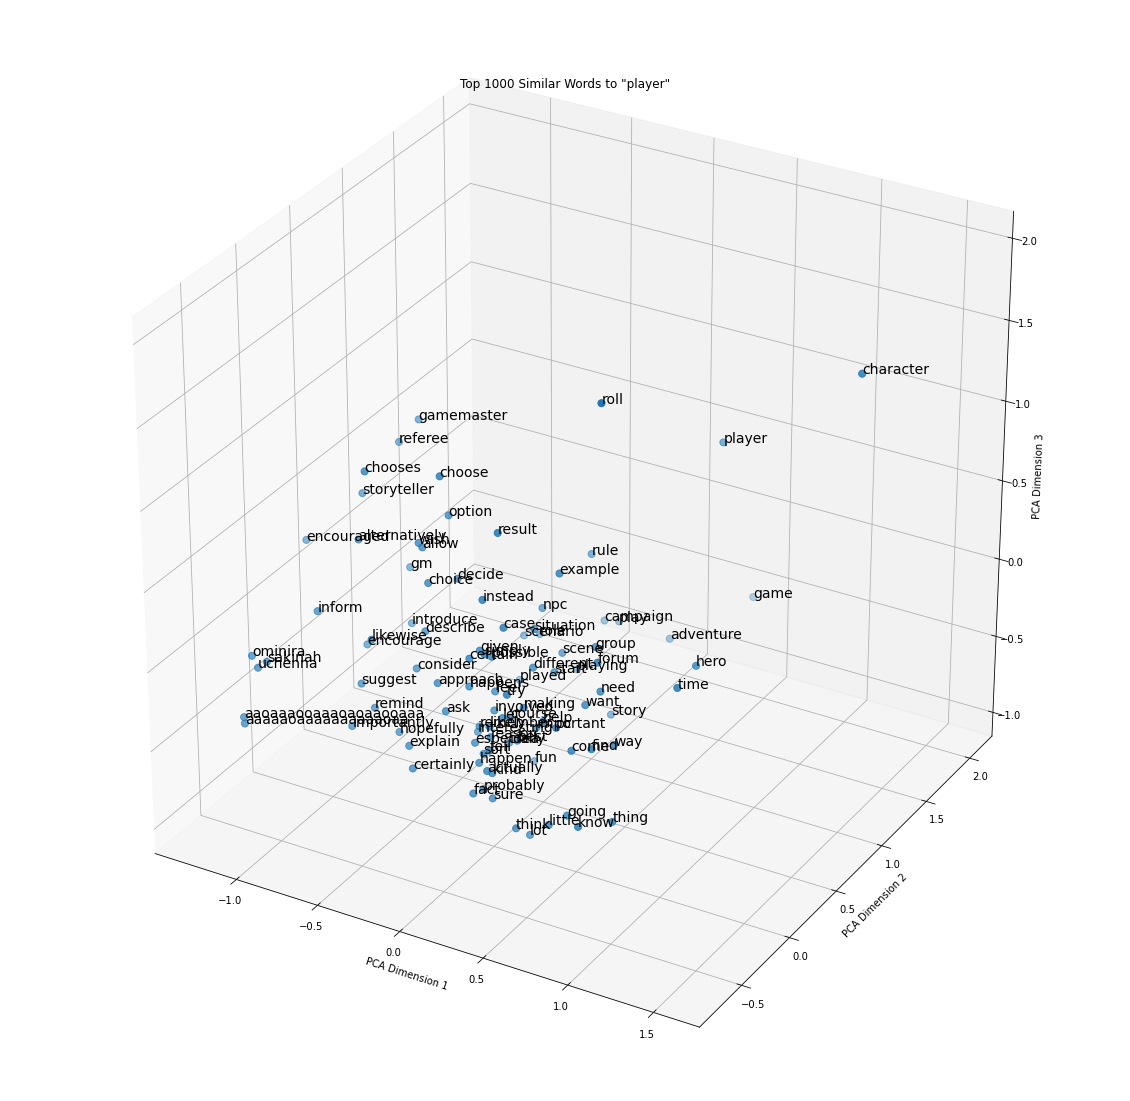

In [154]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#from gensim.models import KeyedVectors

# Load the pre-trained GloVe word embeddings

# Select the top 1000 most similar words to a given word
word = 'player'
similar_words = [word] + [w[0] for w in gloveALL.most_similar(word, 99)]

if 1 == 1:
    # Get the GloVe embeddings for the selected words
    embeddings = []
    labels = []
    for w in similar_words:
        if w in gloveALL.dictionary:
            embeddings.append(gloveALL.word_vectors[gloveALL.dictionary[w]])
            labels.append(w)

    # Apply PCA to reduce the dimensionality of the embeddings to 3
    pca = PCA(n_components=3)
    embeddings_pca = pca.fit_transform(embeddings)

    # Plot the embeddings in 3D space with labels
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], embeddings_pca[:, 2], s=50)
    for i, label in enumerate(labels):
        ax.text(embeddings_pca[i, 0], embeddings_pca[i, 1], embeddings_pca[i, 2], label, fontsize=14)
    ax.set_title('Top 1000 Similar Words to "{}"'.format(word))
    ax.set_xlabel('PCA Dimension 1')
    ax.set_ylabel('PCA Dimension 2')
    ax.set_zlabel('PCA Dimension 3')
    plt.show()

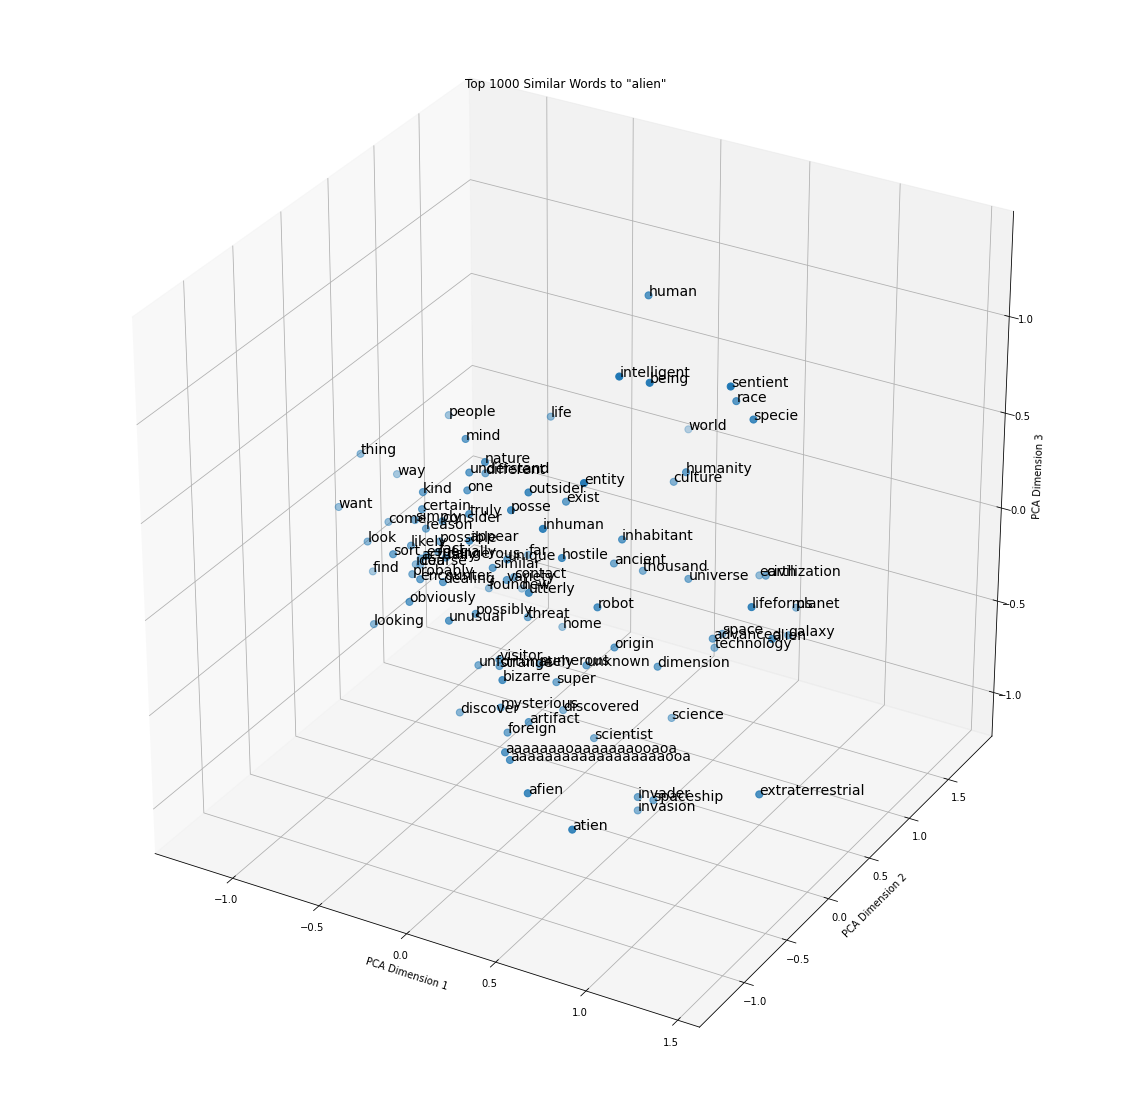

In [155]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#from gensim.models import KeyedVectors

# Load the pre-trained GloVe word embeddings

# Select the top 1000 most similar words to a given word
word = 'alien'
similar_words = [word] + [w[0] for w in gloveALL.most_similar(word, 99)]

if 1 == 1:
    # Get the GloVe embeddings for the selected words
    embeddings = []
    labels = []
    for w in similar_words:
        if w in gloveALL.dictionary:
            embeddings.append(gloveALL.word_vectors[gloveALL.dictionary[w]])
            labels.append(w)

    # Apply PCA to reduce the dimensionality of the embeddings to 3
    pca = PCA(n_components=3)
    embeddings_pca = pca.fit_transform(embeddings)

    # Plot the embeddings in 3D space with labels
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], embeddings_pca[:, 2], s=50)
    for i, label in enumerate(labels):
        ax.text(embeddings_pca[i, 0], embeddings_pca[i, 1], embeddings_pca[i, 2], label, fontsize=14)
    ax.set_title('Top 1000 Similar Words to "{}"'.format(word))
    ax.set_xlabel('PCA Dimension 1')
    ax.set_ylabel('PCA Dimension 2')
    ax.set_zlabel('PCA Dimension 3')
    plt.show()

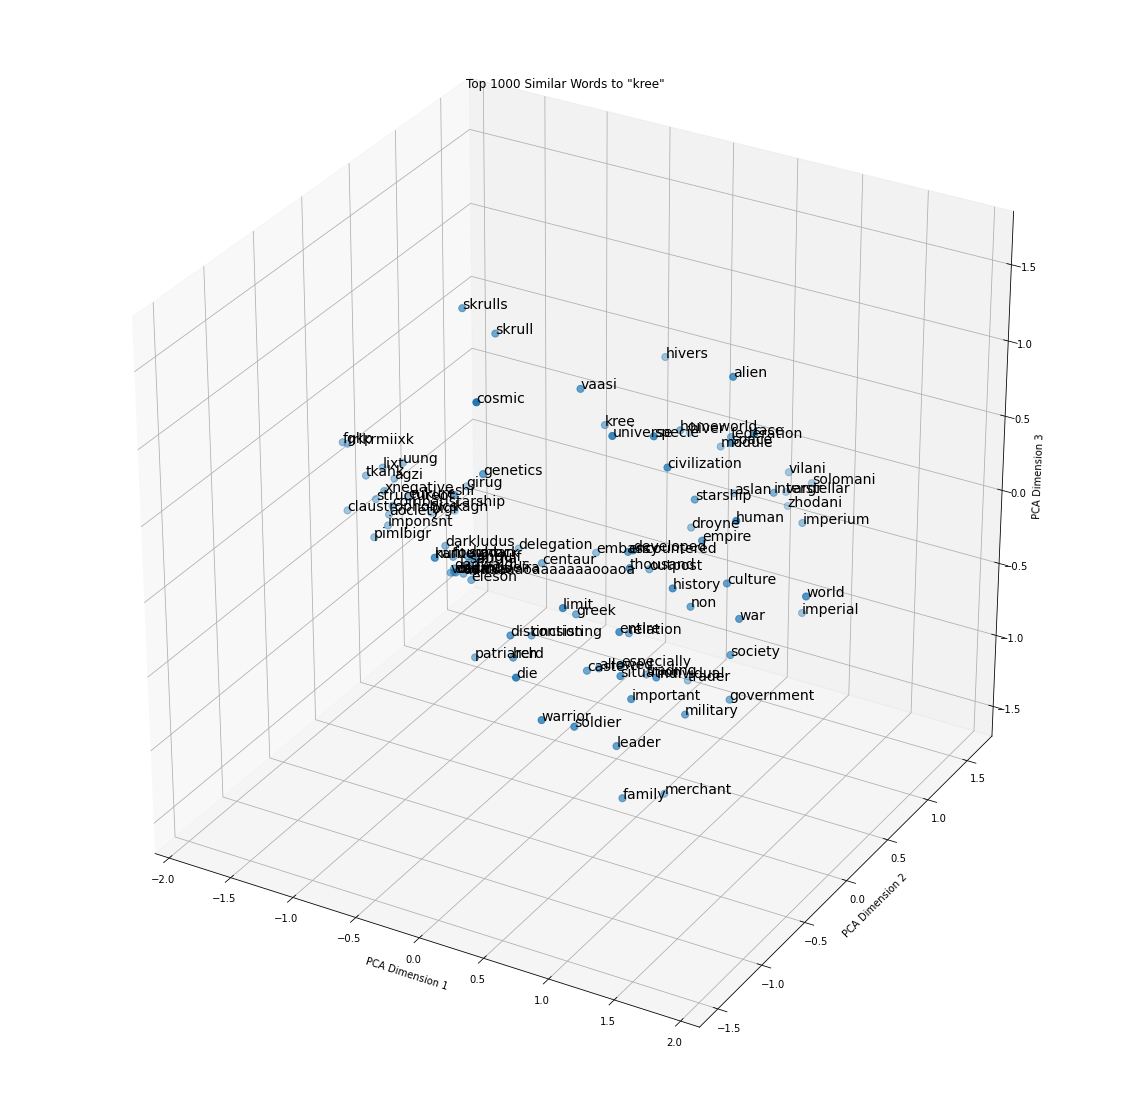

In [157]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#from gensim.models import KeyedVectors

# Load the pre-trained GloVe word embeddings

# Select the top 1000 most similar words to a given word
word = 'kree'
similar_words = [word] + [w[0] for w in gloveALL.most_similar(word, 99)]

if 1 == 1:
    # Get the GloVe embeddings for the selected words
    embeddings = []
    labels = []
    for w in similar_words:
        if w in gloveALL.dictionary:
            embeddings.append(gloveALL.word_vectors[gloveALL.dictionary[w]])
            labels.append(w)

    # Apply PCA to reduce the dimensionality of the embeddings to 3
    pca = PCA(n_components=3)
    embeddings_pca = pca.fit_transform(embeddings)

    # Plot the embeddings in 3D space with labels
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], embeddings_pca[:, 2], s=50)
    for i, label in enumerate(labels):
        ax.text(embeddings_pca[i, 0], embeddings_pca[i, 1], embeddings_pca[i, 2], label, fontsize=14)
    ax.set_title('Top 1000 Similar Words to "{}"'.format(word))
    ax.set_xlabel('PCA Dimension 1')
    ax.set_ylabel('PCA Dimension 2')
    ax.set_zlabel('PCA Dimension 3')
    plt.show()

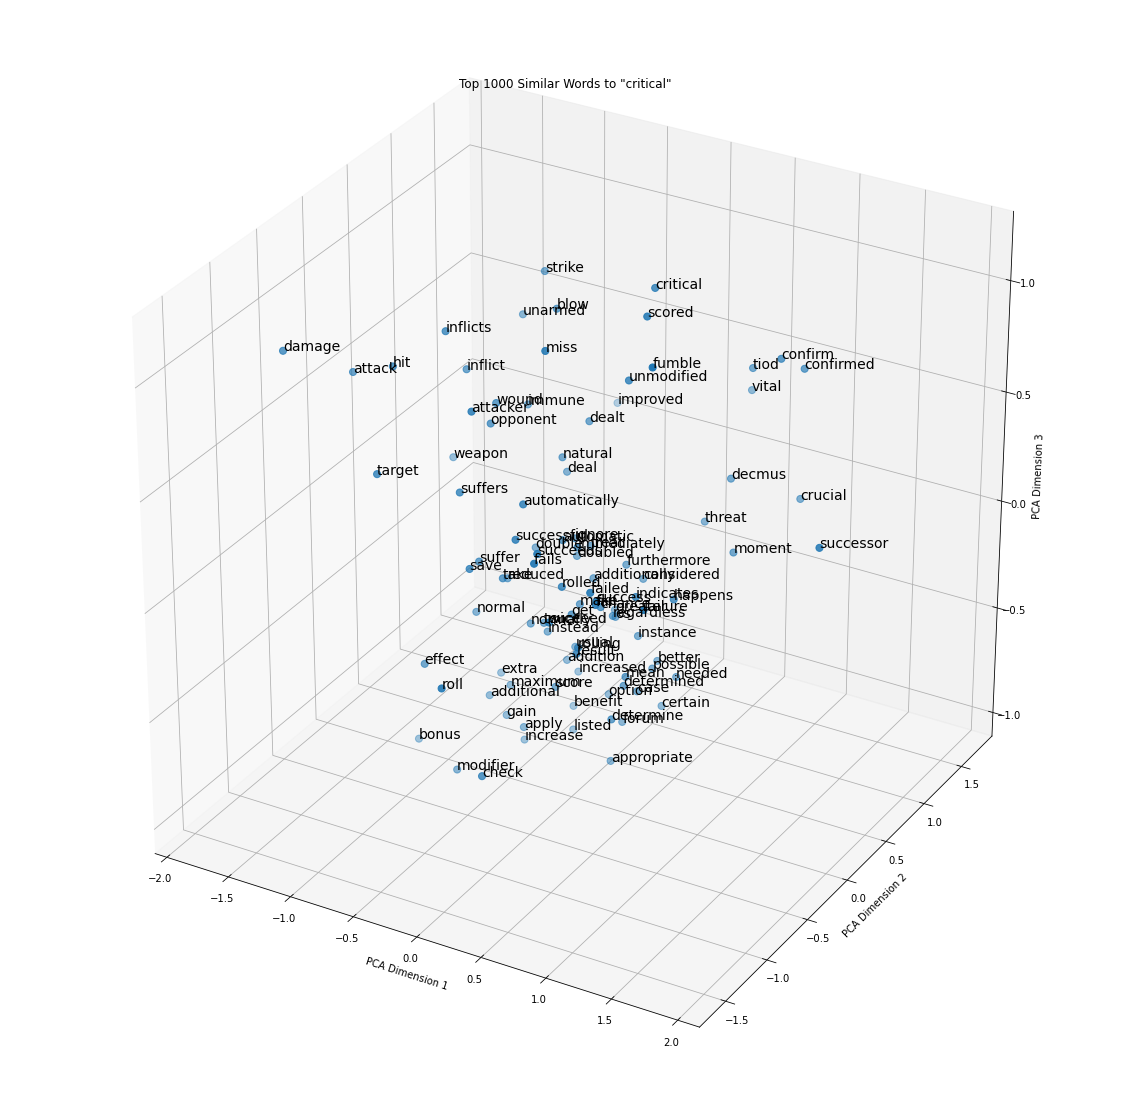

In [159]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#from gensim.models import KeyedVectors

# Load the pre-trained GloVe word embeddings

# Select the top 1000 most similar words to a given word
word = 'critical'
similar_words = [word] + [w[0] for w in gloveALL.most_similar(word, 99)]

if 1 == 1:
    # Get the GloVe embeddings for the selected words
    embeddings = []
    labels = []
    for w in similar_words:
        if w in gloveALL.dictionary:
            embeddings.append(gloveALL.word_vectors[gloveALL.dictionary[w]])
            labels.append(w)

    # Apply PCA to reduce the dimensionality of the embeddings to 3
    pca = PCA(n_components=3)
    embeddings_pca = pca.fit_transform(embeddings)

    # Plot the embeddings in 3D space with labels
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], embeddings_pca[:, 2], s=50)
    for i, label in enumerate(labels):
        ax.text(embeddings_pca[i, 0], embeddings_pca[i, 1], embeddings_pca[i, 2], label, fontsize=14)
    ax.set_title('Top 1000 Similar Words to "{}"'.format(word))
    ax.set_xlabel('PCA Dimension 1')
    ax.set_ylabel('PCA Dimension 2')
    ax.set_zlabel('PCA Dimension 3')
    plt.show()

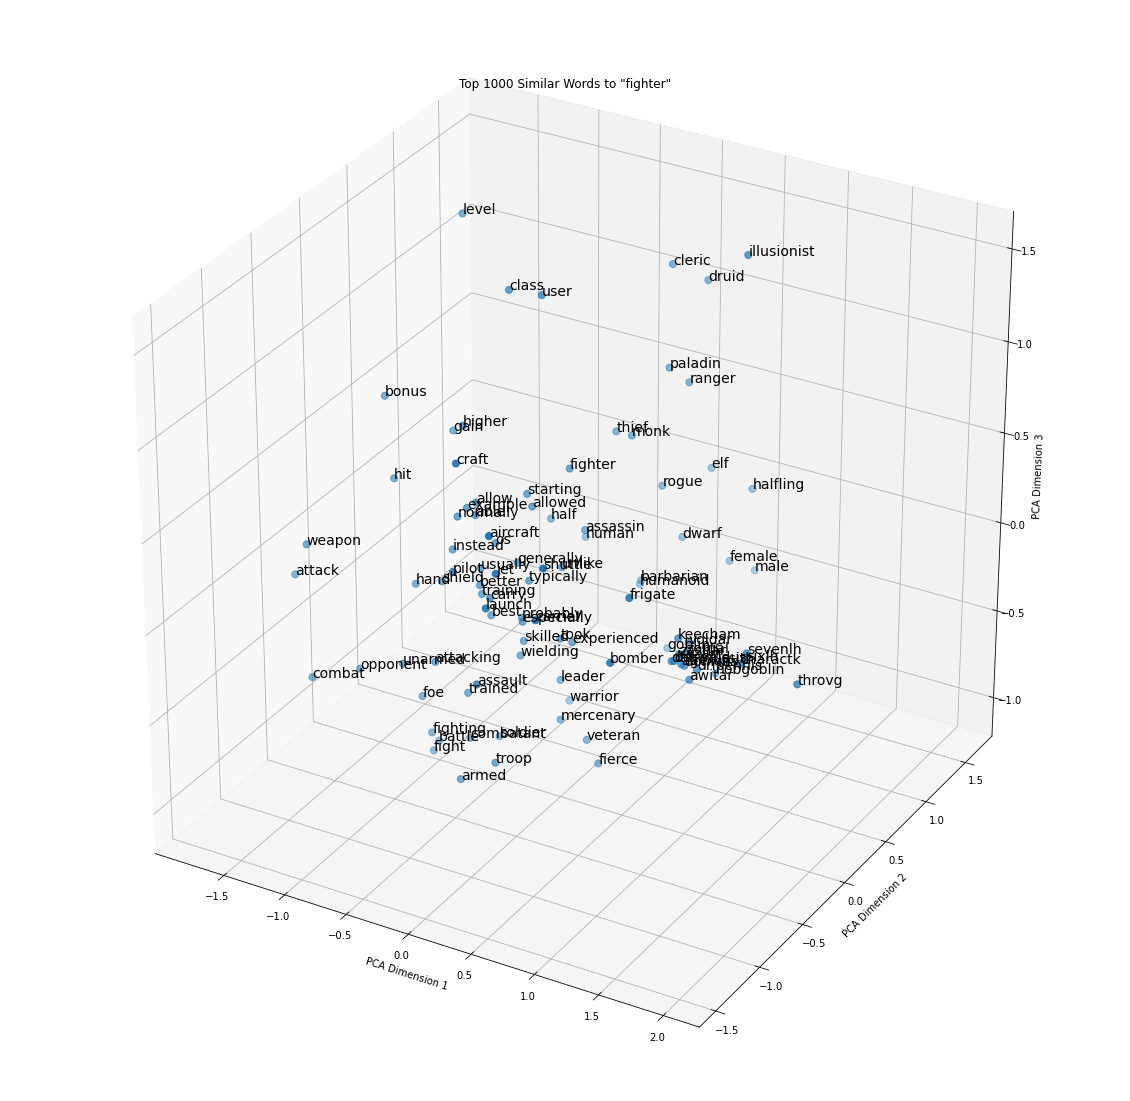

In [160]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#from gensim.models import KeyedVectors

# Load the pre-trained GloVe word embeddings

# Select the top 1000 most similar words to a given word
word = 'fighter'
similar_words = [word] + [w[0] for w in gloveALL.most_similar(word, 99)]

if 1 == 1:
    # Get the GloVe embeddings for the selected words
    embeddings = []
    labels = []
    for w in similar_words:
        if w in gloveALL.dictionary:
            embeddings.append(gloveALL.word_vectors[gloveALL.dictionary[w]])
            labels.append(w)

    # Apply PCA to reduce the dimensionality of the embeddings to 3
    pca = PCA(n_components=3)
    embeddings_pca = pca.fit_transform(embeddings)

    # Plot the embeddings in 3D space with labels
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], embeddings_pca[:, 2], s=50)
    for i, label in enumerate(labels):
        ax.text(embeddings_pca[i, 0], embeddings_pca[i, 1], embeddings_pca[i, 2], label, fontsize=14)
    ax.set_title('Top 1000 Similar Words to "{}"'.format(word))
    ax.set_xlabel('PCA Dimension 1')
    ax.set_ylabel('PCA Dimension 2')
    ax.set_zlabel('PCA Dimension 3')
    plt.show()

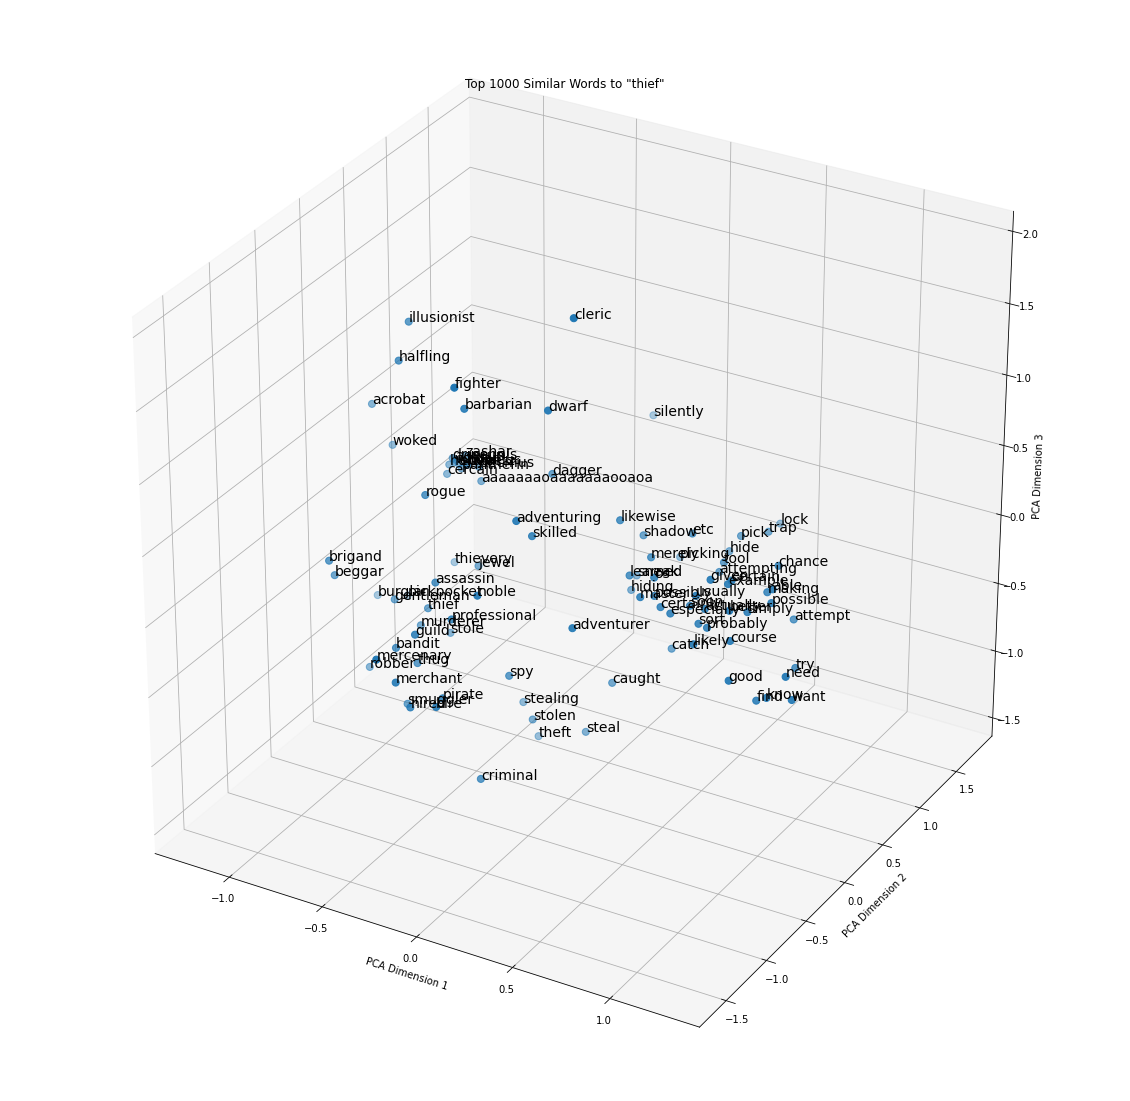

In [161]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#from gensim.models import KeyedVectors

# Load the pre-trained GloVe word embeddings

# Select the top 1000 most similar words to a given word
word = 'thief'
similar_words = [word] + [w[0] for w in gloveALL.most_similar(word, 99)]

if 1 == 1:
    # Get the GloVe embeddings for the selected words
    embeddings = []
    labels = []
    for w in similar_words:
        if w in gloveALL.dictionary:
            embeddings.append(gloveALL.word_vectors[gloveALL.dictionary[w]])
            labels.append(w)

    # Apply PCA to reduce the dimensionality of the embeddings to 3
    pca = PCA(n_components=3)
    embeddings_pca = pca.fit_transform(embeddings)

    # Plot the embeddings in 3D space with labels
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], embeddings_pca[:, 2], s=50)
    for i, label in enumerate(labels):
        ax.text(embeddings_pca[i, 0], embeddings_pca[i, 1], embeddings_pca[i, 2], label, fontsize=14)
    ax.set_title('Top 1000 Similar Words to "{}"'.format(word))
    ax.set_xlabel('PCA Dimension 1')
    ax.set_ylabel('PCA Dimension 2')
    ax.set_zlabel('PCA Dimension 3')
    plt.show()

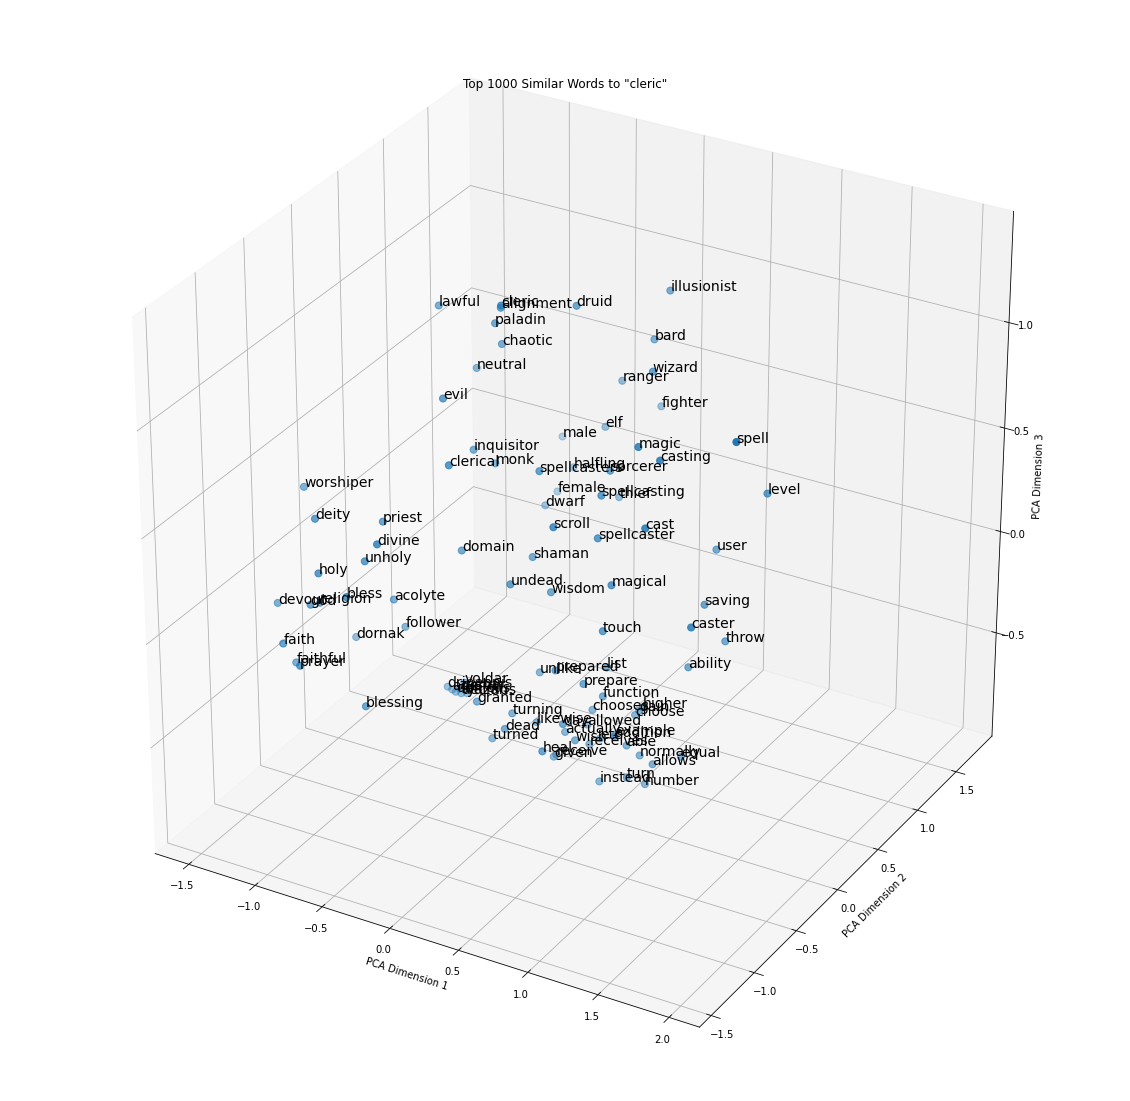

In [162]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#from gensim.models import KeyedVectors

# Load the pre-trained GloVe word embeddings

# Select the top 1000 most similar words to a given word
word = 'cleric'
similar_words = [word] + [w[0] for w in gloveALL.most_similar(word, 99)]

if 1 == 1:
    # Get the GloVe embeddings for the selected words
    embeddings = []
    labels = []
    for w in similar_words:
        if w in gloveALL.dictionary:
            embeddings.append(gloveALL.word_vectors[gloveALL.dictionary[w]])
            labels.append(w)

    # Apply PCA to reduce the dimensionality of the embeddings to 3
    pca = PCA(n_components=3)
    embeddings_pca = pca.fit_transform(embeddings)

    # Plot the embeddings in 3D space with labels
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], embeddings_pca[:, 2], s=50)
    for i, label in enumerate(labels):
        ax.text(embeddings_pca[i, 0], embeddings_pca[i, 1], embeddings_pca[i, 2], label, fontsize=14)
    ax.set_title('Top 1000 Similar Words to "{}"'.format(word))
    ax.set_xlabel('PCA Dimension 1')
    ax.set_ylabel('PCA Dimension 2')
    ax.set_zlabel('PCA Dimension 3')
    plt.show()

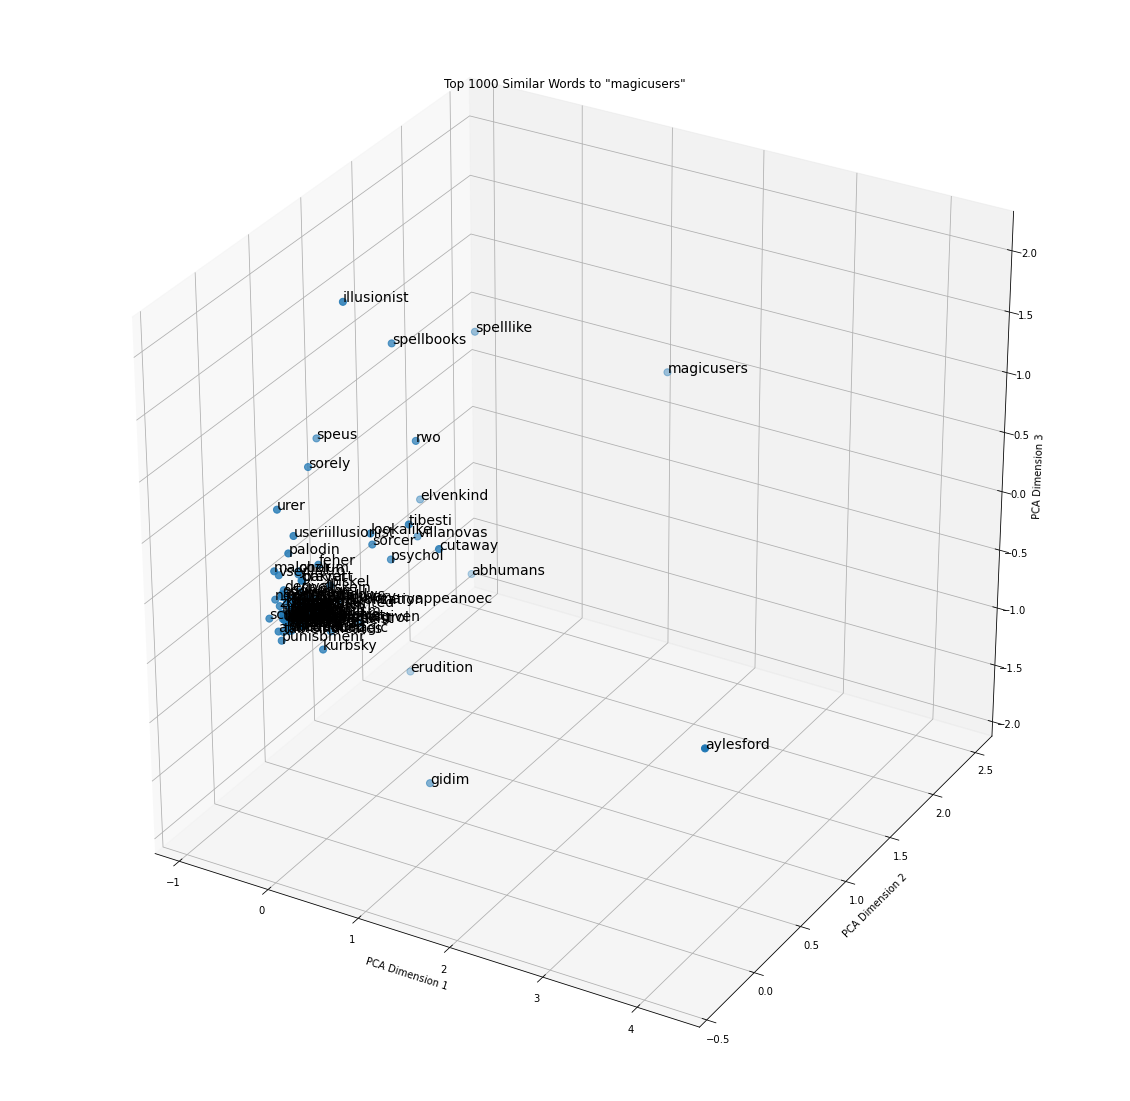

In [163]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#from gensim.models import KeyedVectors

# Load the pre-trained GloVe word embeddings

# Select the top 1000 most similar words to a given word
word = 'magicusers'
similar_words = [word] + [w[0] for w in gloveALL.most_similar(word, 99)]

if 1 == 1:
    # Get the GloVe embeddings for the selected words
    embeddings = []
    labels = []
    for w in similar_words:
        if w in gloveALL.dictionary:
            embeddings.append(gloveALL.word_vectors[gloveALL.dictionary[w]])
            labels.append(w)

    # Apply PCA to reduce the dimensionality of the embeddings to 3
    pca = PCA(n_components=3)
    embeddings_pca = pca.fit_transform(embeddings)

    # Plot the embeddings in 3D space with labels
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], embeddings_pca[:, 2], s=50)
    for i, label in enumerate(labels):
        ax.text(embeddings_pca[i, 0], embeddings_pca[i, 1], embeddings_pca[i, 2], label, fontsize=14)
    ax.set_title('Top 1000 Similar Words to "{}"'.format(word))
    ax.set_xlabel('PCA Dimension 1')
    ax.set_ylabel('PCA Dimension 2')
    ax.set_zlabel('PCA Dimension 3')
    plt.show()

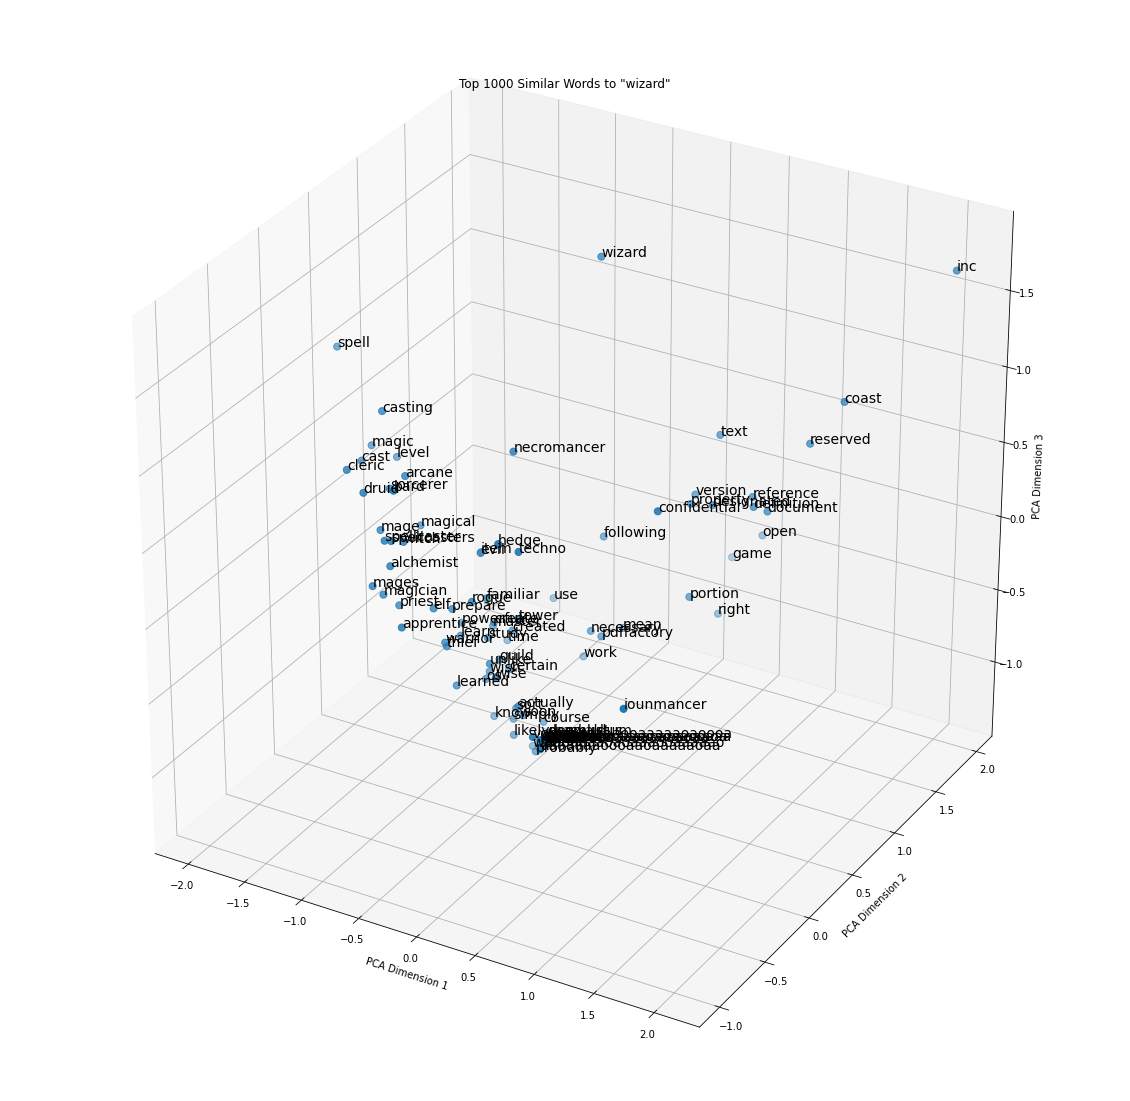

In [164]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#from gensim.models import KeyedVectors

# Load the pre-trained GloVe word embeddings

# Select the top 1000 most similar words to a given word
word = 'wizard'
similar_words = [word] + [w[0] for w in gloveALL.most_similar(word, 99)]

if 1 == 1:
    # Get the GloVe embeddings for the selected words
    embeddings = []
    labels = []
    for w in similar_words:
        if w in gloveALL.dictionary:
            embeddings.append(gloveALL.word_vectors[gloveALL.dictionary[w]])
            labels.append(w)

    # Apply PCA to reduce the dimensionality of the embeddings to 3
    pca = PCA(n_components=3)
    embeddings_pca = pca.fit_transform(embeddings)

    # Plot the embeddings in 3D space with labels
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], embeddings_pca[:, 2], s=50)
    for i, label in enumerate(labels):
        ax.text(embeddings_pca[i, 0], embeddings_pca[i, 1], embeddings_pca[i, 2], label, fontsize=14)
    ax.set_title('Top 1000 Similar Words to "{}"'.format(word))
    ax.set_xlabel('PCA Dimension 1')
    ax.set_ylabel('PCA Dimension 2')
    ax.set_zlabel('PCA Dimension 3')
    plt.show()

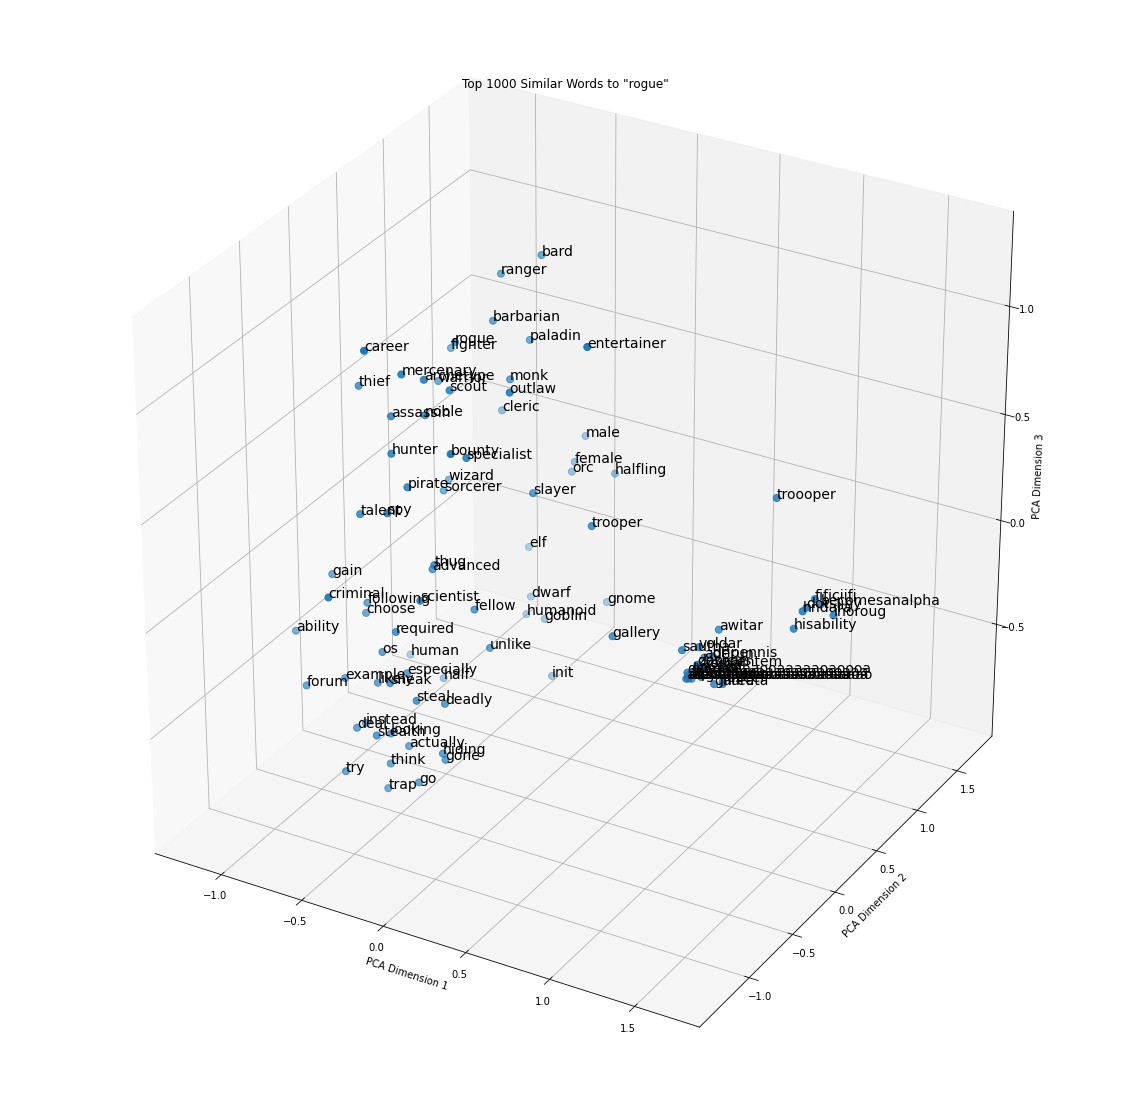

In [165]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#from gensim.models import KeyedVectors

# Load the pre-trained GloVe word embeddings

# Select the top 1000 most similar words to a given word
word = 'rogue'
similar_words = [word] + [w[0] for w in gloveALL.most_similar(word, 99)]

if 1 == 1:
    # Get the GloVe embeddings for the selected words
    embeddings = []
    labels = []
    for w in similar_words:
        if w in gloveALL.dictionary:
            embeddings.append(gloveALL.word_vectors[gloveALL.dictionary[w]])
            labels.append(w)

    # Apply PCA to reduce the dimensionality of the embeddings to 3
    pca = PCA(n_components=3)
    embeddings_pca = pca.fit_transform(embeddings)

    # Plot the embeddings in 3D space with labels
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], embeddings_pca[:, 2], s=50)
    for i, label in enumerate(labels):
        ax.text(embeddings_pca[i, 0], embeddings_pca[i, 1], embeddings_pca[i, 2], label, fontsize=14)
    ax.set_title('Top 1000 Similar Words to "{}"'.format(word))
    ax.set_xlabel('PCA Dimension 1')
    ax.set_ylabel('PCA Dimension 2')
    ax.set_zlabel('PCA Dimension 3')
    plt.show()

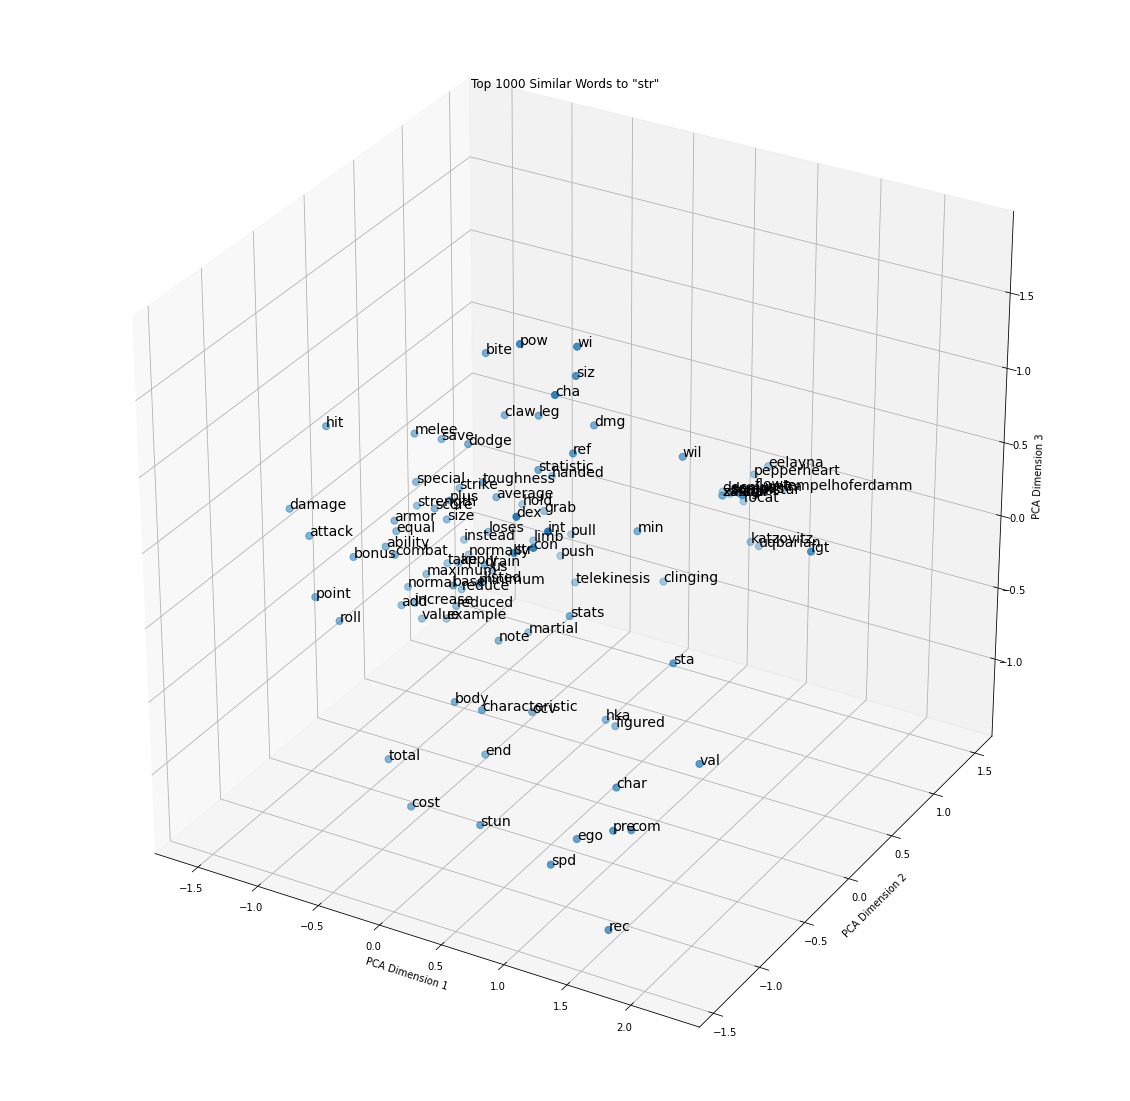

In [166]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#from gensim.models import KeyedVectors

# Load the pre-trained GloVe word embeddings

# Select the top 1000 most similar words to a given word
word = 'str'
similar_words = [word] + [w[0] for w in gloveALL.most_similar(word, 99)]

if 1 == 1:
    # Get the GloVe embeddings for the selected words
    embeddings = []
    labels = []
    for w in similar_words:
        if w in gloveALL.dictionary:
            embeddings.append(gloveALL.word_vectors[gloveALL.dictionary[w]])
            labels.append(w)

    # Apply PCA to reduce the dimensionality of the embeddings to 3
    pca = PCA(n_components=3)
    embeddings_pca = pca.fit_transform(embeddings)

    # Plot the embeddings in 3D space with labels
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], embeddings_pca[:, 2], s=50)
    for i, label in enumerate(labels):
        ax.text(embeddings_pca[i, 0], embeddings_pca[i, 1], embeddings_pca[i, 2], label, fontsize=14)
    ax.set_title('Top 1000 Similar Words to "{}"'.format(word))
    ax.set_xlabel('PCA Dimension 1')
    ax.set_ylabel('PCA Dimension 2')
    ax.set_zlabel('PCA Dimension 3')
    plt.show()

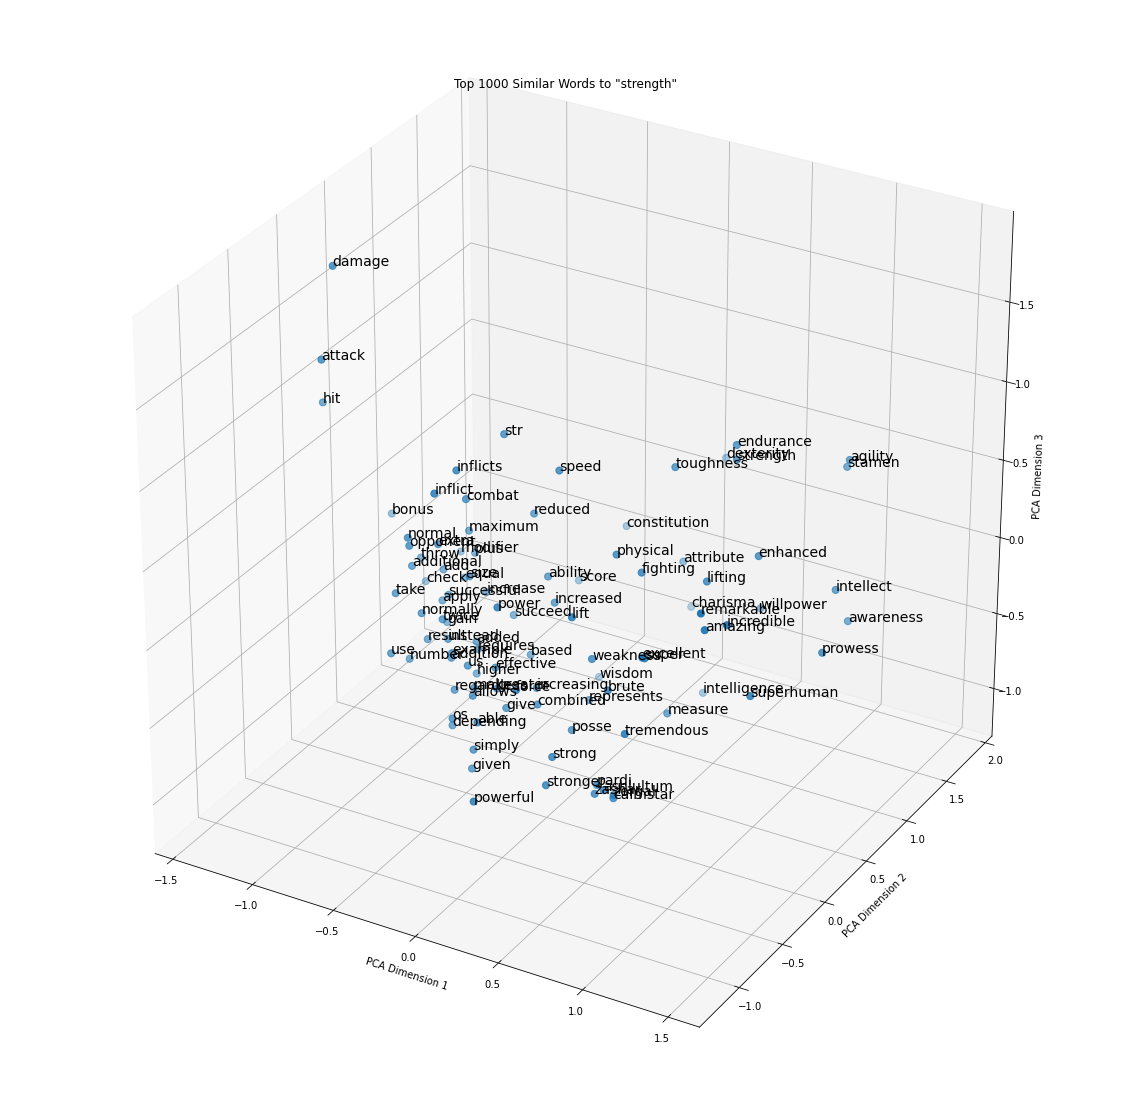

In [167]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#from gensim.models import KeyedVectors

# Load the pre-trained GloVe word embeddings

# Select the top 1000 most similar words to a given word
word = 'strength'
similar_words = [word] + [w[0] for w in gloveALL.most_similar(word, 99)]

if 1 == 1:
    # Get the GloVe embeddings for the selected words
    embeddings = []
    labels = []
    for w in similar_words:
        if w in gloveALL.dictionary:
            embeddings.append(gloveALL.word_vectors[gloveALL.dictionary[w]])
            labels.append(w)

    # Apply PCA to reduce the dimensionality of the embeddings to 3
    pca = PCA(n_components=3)
    embeddings_pca = pca.fit_transform(embeddings)

    # Plot the embeddings in 3D space with labels
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], embeddings_pca[:, 2], s=50)
    for i, label in enumerate(labels):
        ax.text(embeddings_pca[i, 0], embeddings_pca[i, 1], embeddings_pca[i, 2], label, fontsize=14)
    ax.set_title('Top 1000 Similar Words to "{}"'.format(word))
    ax.set_xlabel('PCA Dimension 1')
    ax.set_ylabel('PCA Dimension 2')
    ax.set_zlabel('PCA Dimension 3')
    plt.show()

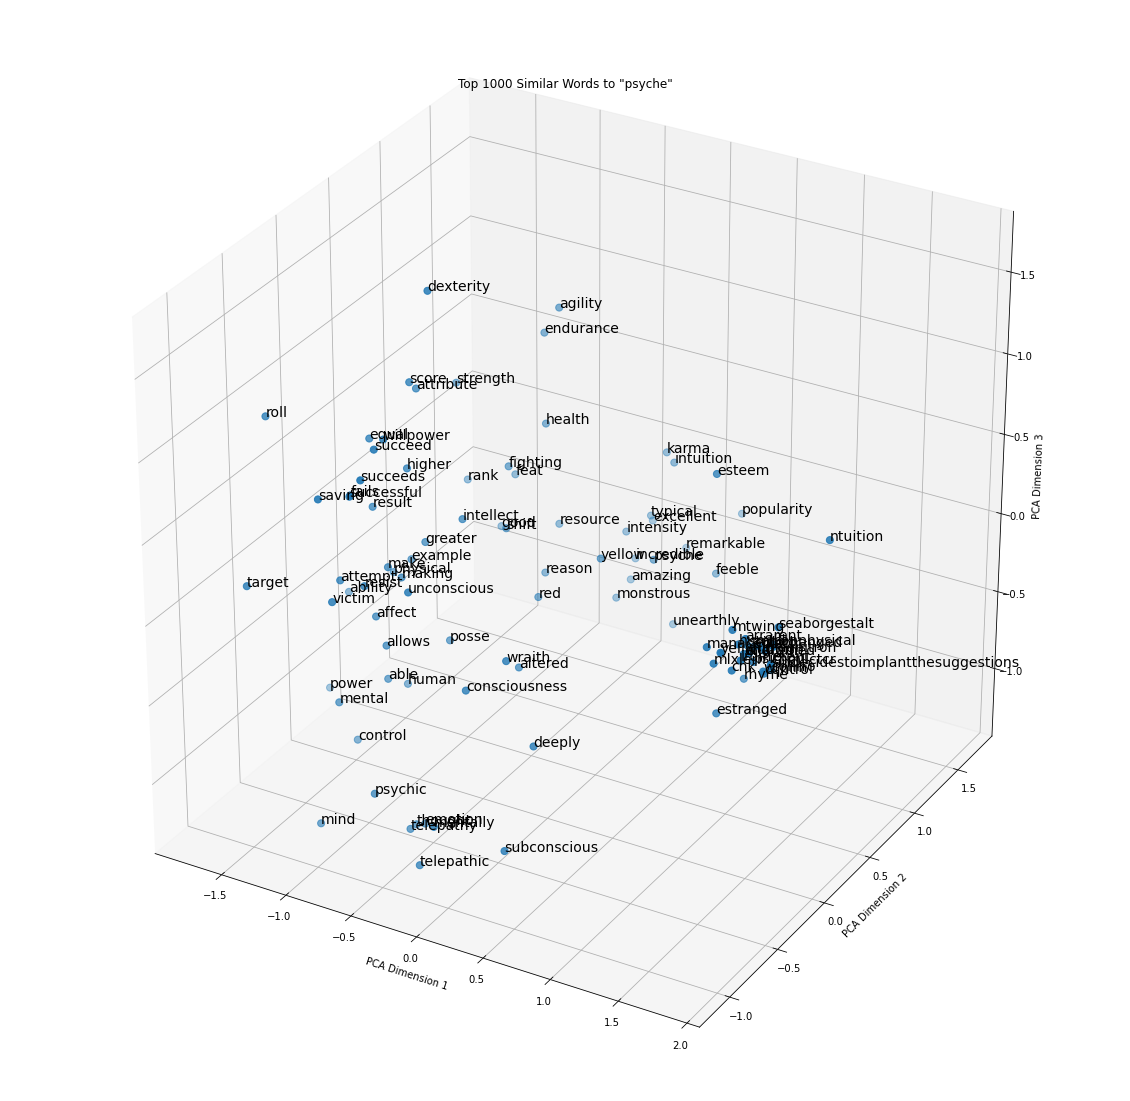

In [168]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#from gensim.models import KeyedVectors

# Load the pre-trained GloVe word embeddings

# Select the top 1000 most similar words to a given word
word = 'psyche'
similar_words = [word] + [w[0] for w in gloveALL.most_similar(word, 99)]

if 1 == 1:
    # Get the GloVe embeddings for the selected words
    embeddings = []
    labels = []
    for w in similar_words:
        if w in gloveALL.dictionary:
            embeddings.append(gloveALL.word_vectors[gloveALL.dictionary[w]])
            labels.append(w)

    # Apply PCA to reduce the dimensionality of the embeddings to 3
    pca = PCA(n_components=3)
    embeddings_pca = pca.fit_transform(embeddings)

    # Plot the embeddings in 3D space with labels
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], embeddings_pca[:, 2], s=50)
    for i, label in enumerate(labels):
        ax.text(embeddings_pca[i, 0], embeddings_pca[i, 1], embeddings_pca[i, 2], label, fontsize=14)
    ax.set_title('Top 1000 Similar Words to "{}"'.format(word))
    ax.set_xlabel('PCA Dimension 1')
    ax.set_ylabel('PCA Dimension 2')
    ax.set_zlabel('PCA Dimension 3')
    plt.show()

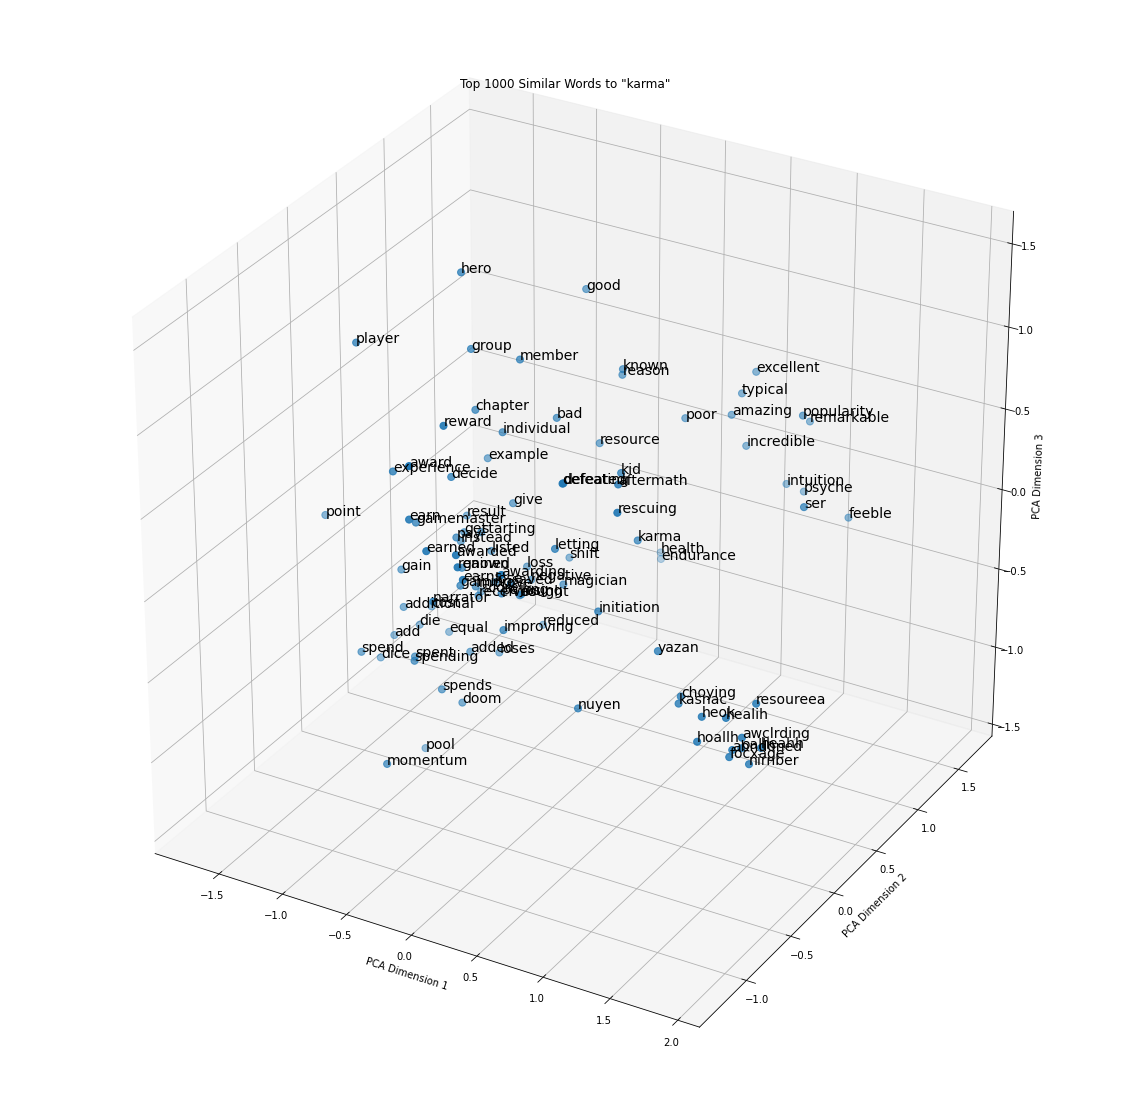

In [169]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#from gensim.models import KeyedVectors

# Load the pre-trained GloVe word embeddings

# Select the top 1000 most similar words to a given word
word = 'karma'
similar_words = [word] + [w[0] for w in gloveALL.most_similar(word, 99)]

if 1 == 1:
    # Get the GloVe embeddings for the selected words
    embeddings = []
    labels = []
    for w in similar_words:
        if w in gloveALL.dictionary:
            embeddings.append(gloveALL.word_vectors[gloveALL.dictionary[w]])
            labels.append(w)

    # Apply PCA to reduce the dimensionality of the embeddings to 3
    pca = PCA(n_components=3)
    embeddings_pca = pca.fit_transform(embeddings)

    # Plot the embeddings in 3D space with labels
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], embeddings_pca[:, 2], s=50)
    for i, label in enumerate(labels):
        ax.text(embeddings_pca[i, 0], embeddings_pca[i, 1], embeddings_pca[i, 2], label, fontsize=14)
    ax.set_title('Top 1000 Similar Words to "{}"'.format(word))
    ax.set_xlabel('PCA Dimension 1')
    ax.set_ylabel('PCA Dimension 2')
    ax.set_zlabel('PCA Dimension 3')
    plt.show()

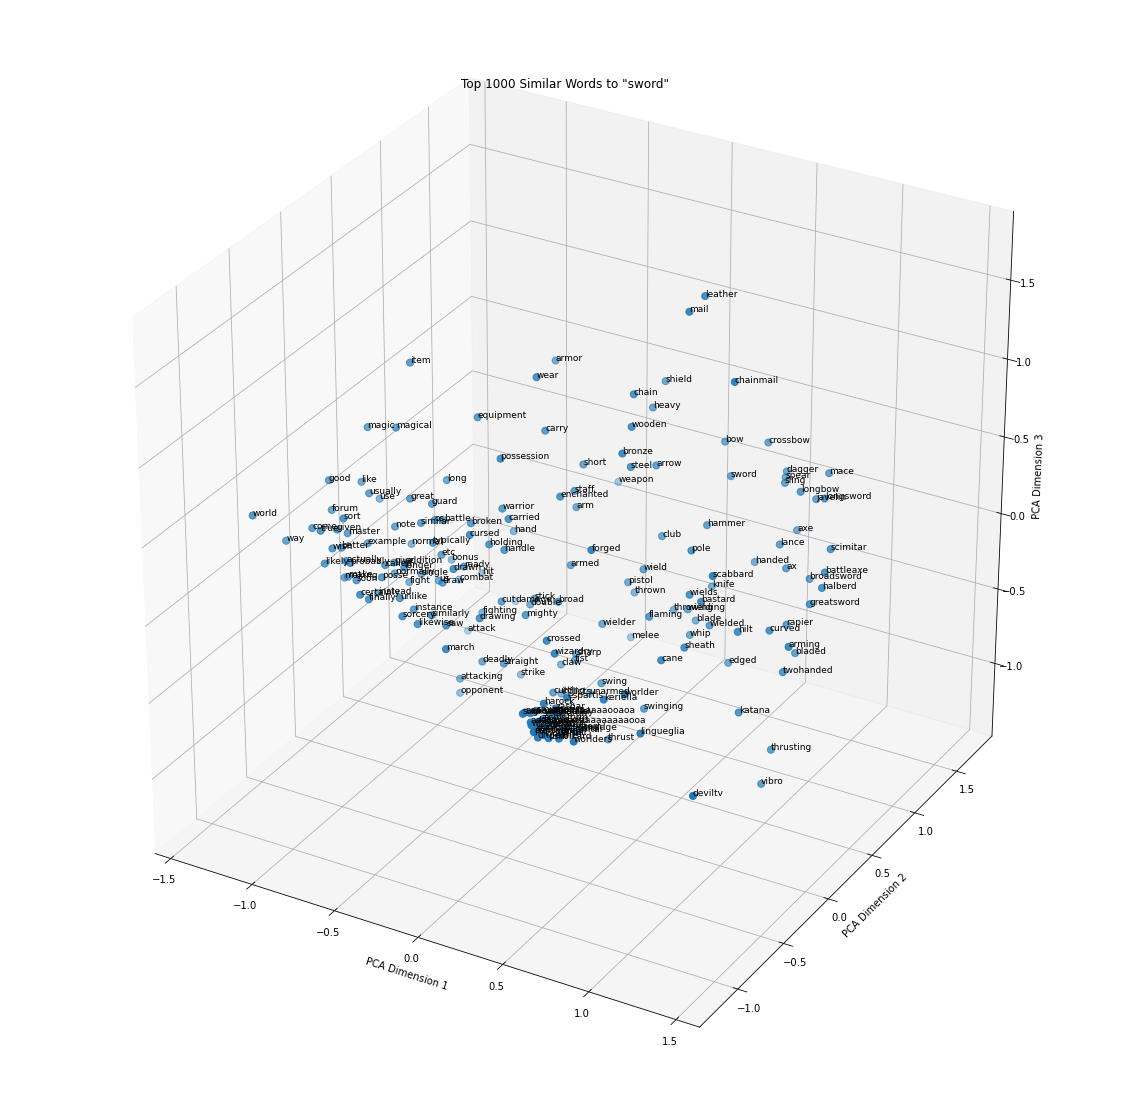

In [182]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#from gensim.models import KeyedVectors

# Load the pre-trained GloVe word embeddings

# Select the top 1000 most similar words to a given word
word = 'sword'
similar_words = [word] + [w[0] for w in gloveALL.most_similar(word, 199)]

if 1 == 1:
    # Get the GloVe embeddings for the selected words
    embeddings = []
    labels = []
    for w in similar_words:
        if w in gloveALL.dictionary:
            embeddings.append(gloveALL.word_vectors[gloveALL.dictionary[w]])
            labels.append(w)

    # Apply PCA to reduce the dimensionality of the embeddings to 3
    pca = PCA(n_components=3)
    embeddings_pca = pca.fit_transform(embeddings)

    # Plot the embeddings in 3D space with labels
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], embeddings_pca[:, 2], s=50)
    for i, label in enumerate(labels):
        ax.text(embeddings_pca[i, 0], embeddings_pca[i, 1], embeddings_pca[i, 2], label, fontsize=9)
    ax.set_title('Top 1000 Similar Words to "{}"'.format(word))
    ax.set_xlabel('PCA Dimension 1')
    ax.set_ylabel('PCA Dimension 2')
    ax.set_zlabel('PCA Dimension 3')
    plt.show()